Cases we can examinate:


nowin_bo0200_P0p16_uoc0p50_reW2.5e4_L10 

re720_bo0200_P0p08_uoc0p25_reW1.0e5_L10 

re720_bo0200_P0p08_uoc0p25_reW2.5e4_L10 

re720_bo0200_P0p08_uoc0p25_reW2.5e4_L11 

re720_bo0200_P0p08_uoc0p50_reW1.0e5_L10 

re720_bo0200_P0p08_uoc0p50_reW2.5e4_L10 

re720_bo0200_P0p08_uoc0p75_reW2.5e4_L10 

re720_bo0200_P0p16_uoc0p25_reW1.0e5_L10 

re720_bo0200_P0p16_uoc0p25_reW2.5e4_L10 

re720_bo0200_P0p16_uoc0p25_reW2.5e4_L11 

re720_bo0200_P0p16_uoc0p50_reW1.0e5_L10 

re720_bo0200_P0p16_uoc0p50_reW2.5e4_L10 

re720_bo0200_P0p16_uoc0p50_reW2.5e4_L11 

re720_bo0200_P0p16_uoc0p75_reW2.5e4_L10 

re720_bo1000_P0p16_uoc0p75_reW2.5e4_L10 

In [1]:
# Librerías estándar y de terceros
import os
import sys
import gc
import math as m
import numpy as np
import scipy
import pandas as pd
from scipy import *
from scipy.signal import butter, filtfilt, hilbert
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.cm as cm
from scipy.interpolate import interp1d

import pylab
params = {'legend.fontsize': 'x-Large',
          'figure.figsize': (15, 6),
         'axes.labelsize': 33,
         'axes.titlesize':33,
         'xtick.labelsize':30,
         'ytick.labelsize':30,
    'font.family': 'STIXGeneral',  
    'axes.titleweight': 'normal',
    'axes.labelweight': 'normal',
    'text.usetex': True, 
}

pylab.rcParams.update(params)
sys.path.append('/projects/DEIKE/cmartinb/functions')
from prepare import load_object, save_object, field
from defs import Case, Interface2D
from phase import extract_phase
from funciones import * 

os.chdir('/projects/DEIKE/cmartinb/')

In [2]:
# DEFINE CASE SO WE CAN AUTHOMATIZE IT 
kpHs = '0p08' # 0p16 
uoc = '0p25' # 0p50 0p75
reW = '1.0e5' #2.5e4
reA = 720
maxLevel = 10 #11
Bo=200

if reW == '1.0e5':
    Re_water = 1 * 10**5
else:
    Re_water = 2.5 * 10**4

if uoc == '0p75':
    N = 1024
else:
    N = 512 

#Common parameters 
kp = 4
u = 0.5
lambdap = 2*m.pi/kp

L0 = 2*np.pi;


ak, c, omegap, nu_water, g , uoc_val= calculate_parameters(kpHs, uoc , u ,kp)
print('ak is', ak, 'c is' ,c, 'w_p$ is', omegap, '$\nu_w$ is' , nu_water, 'g is' ,g, 'N', N)

ak is 0.08 c is 2.0 w_p$ is 4.0 $
u_w$ is 0.0001256637061435917 g is 4 N 512


In [3]:
import os

new_folder_path = f'/projects/DEIKE/cmartinb/graphs/2D_spectra/re{reA}_bo0{Bo}_P{kpHs}_uoc{uoc}_reW{reW}_L{maxLevel}'

if not os.path.exists(new_folder_path):
    # Create the new folder
    os.makedirs(new_folder_path, exist_ok=True)
    print(f"Folder '{new_folder_path}' created successfully.")
else:
    print(f"Folder '{new_folder_path}' already exists.")

Folder '/projects/DEIKE/cmartinb/graphs/2D_spectra/re720_bo0200_P0p08_uoc0p25_reW1.0e5_L10' created successfully.


In [4]:
work_dir = f'/projects/DEIKE/nscapin/broadband_reorder/re{reA}_bo0{Bo}_P{kpHs}_uoc{uoc}_reW{reW}_L{maxLevel}/'
data = np.loadtxt(work_dir+'eta/global_int.out')
#re720_bo0200_P0p16_uoc0p50_reW1.0e5_L10
istep_c =data[:, 1]
time = data[:,0] 
#print(time.shape)
tstart = time[0]

In [5]:
'''
eta_series = np.zeros((istep_c.shape[0],N,N), dtype=np.float32)
j=0
for i in istep_c:
    
    filename = work_dir + f'eta/eta_loc/eta_loc_t{int(i):09}.bin'
    etalo = np.fromfile(filename)
    size  = etalo.shape;
    tot_row = 18
    tot_row_i = int(size[0]/tot_row);
    etalo = etalo.reshape([tot_row_i, tot_row]);
    
    eta_m0  = 1.0; cirp_th = 0.20;
    new_row = 0;
    for i in range(tot_row_i):
        if ( abs(etalo[i][12]-eta_m0) < cirp_th ):
            new_row += 1;
    #
    print('iteration', j ,"Second pass of remove")
    etal = np.zeros([new_row, 18]);
    for i in range(new_row):
        if ( abs(etalo[i][12]-eta_m0) < cirp_th ):
            etal[i][:] = etalo[i][:];
    xarray = np.linspace(-L0/2., L0/2.,N,endpoint=False)+L0/2/N/2 # Centered grid for interpolation
    yarray = np.linspace(-L0/2., L0/2.,N,endpoint=False)+L0/2/N/2 # Centered grid for interpolation
    xtile, ytile = np.meshgrid(xarray,yarray)
    eta = griddata((etal[:,0].ravel(), etal[:,1].ravel()), etal[:,12].ravel(), (xtile, ytile), method='nearest')
    eta_series[j]= eta
    j+=1
'''

'\neta_series = np.zeros((istep_c.shape[0],N,N), dtype=np.float32)\nj=0\nfor i in istep_c:\n    \n    filename = work_dir + f\'eta/eta_loc/eta_loc_t{int(i):09}.bin\'\n    etalo = np.fromfile(filename)\n    size  = etalo.shape;\n    tot_row = 18\n    tot_row_i = int(size[0]/tot_row);\n    etalo = etalo.reshape([tot_row_i, tot_row]);\n    \n    eta_m0  = 1.0; cirp_th = 0.20;\n    new_row = 0;\n    for i in range(tot_row_i):\n        if ( abs(etalo[i][12]-eta_m0) < cirp_th ):\n            new_row += 1;\n    #\n    print(\'iteration\', j ,"Second pass of remove")\n    etal = np.zeros([new_row, 18]);\n    for i in range(new_row):\n        if ( abs(etalo[i][12]-eta_m0) < cirp_th ):\n            etal[i][:] = etalo[i][:];\n    xarray = np.linspace(-L0/2., L0/2.,N,endpoint=False)+L0/2/N/2 # Centered grid for interpolation\n    yarray = np.linspace(-L0/2., L0/2.,N,endpoint=False)+L0/2/N/2 # Centered grid for interpolation\n    xtile, ytile = np.meshgrid(xarray,yarray)\n    eta = griddata((etal[:

In [6]:
#np.save(f'/projects/DEIKE/cmartinb/eta/eta_series_re{reA}_bo0{Bo}_P{kpHs}_uoc{uoc}_reW{reW}_L{maxLevel}.npy', eta_series)


In [7]:
eta_series = np.load(f'/projects/DEIKE/cmartinb/eta/eta_series_re{reA}_bo0{Bo}_P{kpHs}_uoc{uoc}_reW{reW}_L{maxLevel}.npy', allow_pickle=True)
print(eta_series.shape)

(490, 512, 512)


/tmp/ipykernel_2188287/2784925073.py:100: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0,10])


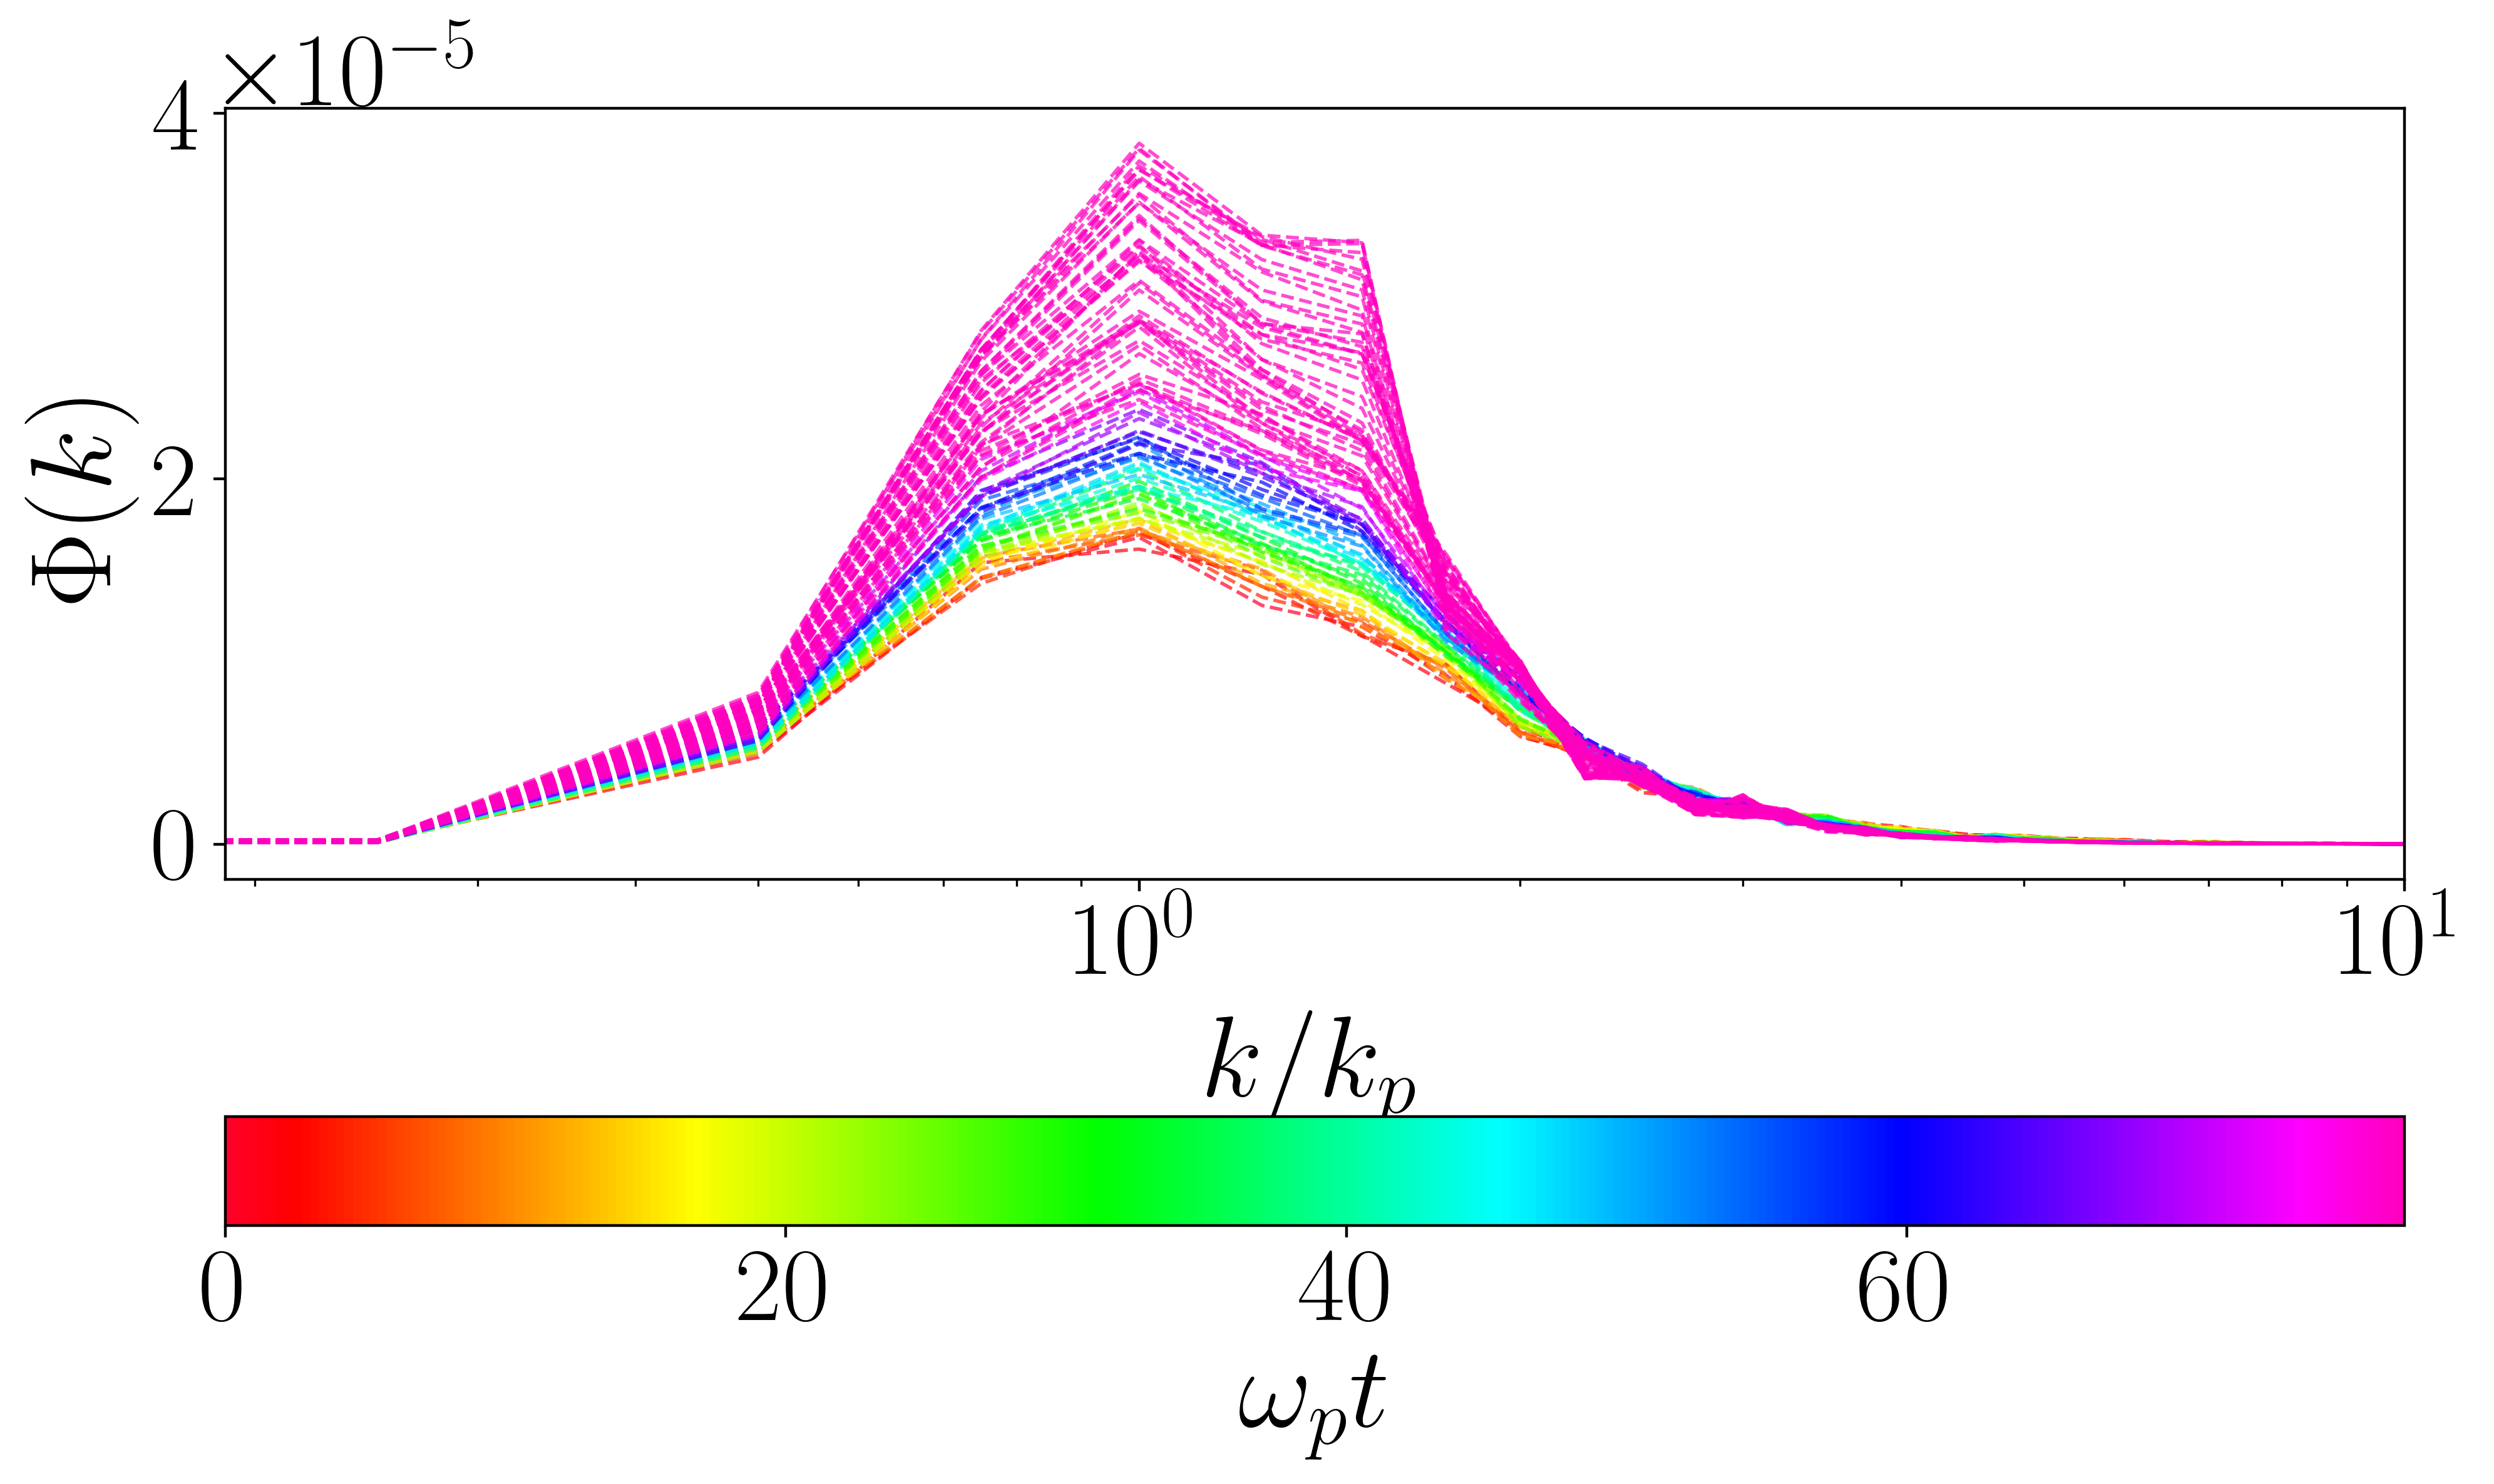

In [12]:
color_map = plt.cm.gist_rainbow
fig = plt.figure(figsize=(10, 6))
ax = fig.gca()

num_rows = 2
num_cols = 3

j = 0

variance = []
integral = []
polar_integral = []

# modes growth
energy_mode = []
coordx_mode = []
k_second = []

energy_secondmode = []
coordx_secondmode =[]
pylab.rcParams.update(params)

filtered_coordx_mode = []
filtered_energy_mode = []

#Loop in time


for i in range(len(eta_series)):
    eta = eta_series[i]
    #print(i, variance)
    k, F_center, F_center_polar_integrated, F_center_polar, k_tile, kxp_tile, kyp_tile, theta_tile, theta, varr, integ, int_pol , kx, ky = spectrum_integration(
        eta - np.mean(eta), N, L, CHECK=False)
    #print('k', k, 'kx', kx[int(len(kx)/2):])
    #k = kx[int(len(kx)/2):]
    dk = k[1] - k[0]
    
    #print(k)
    if i == 0:

        indices1 = np.arange(0, np.where(k >= 1)[0][0], max(1, int(0.25 / dk)))
        indices10 = np.arange(np.where(k >= 1)[0][0], np.where(k >= 10)[0][0], max(1, int(1 / dk)))
        indices1020 = np.arange(np.where(k >= 10)[0][0], np.where(k > 40)[0][0], max(1, int(1 / dk)))
        indices100 = np.arange(np.where(k >= 20)[0][0], np.where(k > 100)[0][0], max(1, int(10/ dk)))
        indicesplus = np.arange(np.where(k >= 100)[0][0], len(k), max(1, int(20 / dk)))

        k_multiples = np.concatenate((indices1, indices10, indices1020 ,indices100, indicesplus))

        k_multiples = k_multiples.astype(int)
        # Obtener los valores de k y las energías correspondientes
        k_seleccionados = k[k_multiples]

    energias_correspondientes = F_center_polar_integrated[k_multiples]
    #k = k/4
    
    if i == 0:
        E0_both = np.sum(F_center_polar_integrated) * dk
        #print(type(indices_cada_diez))
        E0_nodes_both = F_center_polar_integrated[k_multiples]
        #E0_second_both =  F_center_polar_integrated[k_second]
    
    if i % 5 == 0:
        psd = ax.plot(k/4, F_center_polar_integrated, '--', color=plt.cm.get_cmap('gist_rainbow')(j), alpha=0.7, linewidth=1)
    
    energy_mode.append(energias_correspondientes.tolist())
    #coordx_mode.append(coordx.tolist())
    integral.append(integ)
    variance.append(varr)
    polar_integral.append(int_pol)
 
    j += 1

# plot where are the nodes

#for km in k_seleccionados:
    #plt.axvline(x=km, color='gray', linestyle='--', linewidth=0.3)
    
#ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
#plt.legend(loc='upper right', fontsize=4)


color_values =  (omegap*(np.array(time)-time[0]))

# Now set the normalization with the correct range

norm = plt.Normalize(vmin=color_values.min(), vmax=color_values.max())
sm = plt.cm.ScalarMappable(cmap=color_map, norm=norm)
sm.set_array([])  

# Add the colorbar to the figure
cbar = plt.colorbar(sm, orientation='horizontal', pad=0.2)

# Set colorbar label and other properties if needed
cbar.set_label('$\omega_{p} t$')


fig.tight_layout()
cbar.set_label('$\omega_{p} t$')
plt.xscale('log')
plt.xlim([0,10])
#plt.ylim([10**-11,10**-3])
#plt.yscale('log')
plt.xlabel('$\mathdefault{k/k_{p}}$')
plt.ylabel('$\mathdefault{\Phi(k)}$')
fig.tight_layout()

IndexError: index 397 is out of bounds for axis 0 with size 397

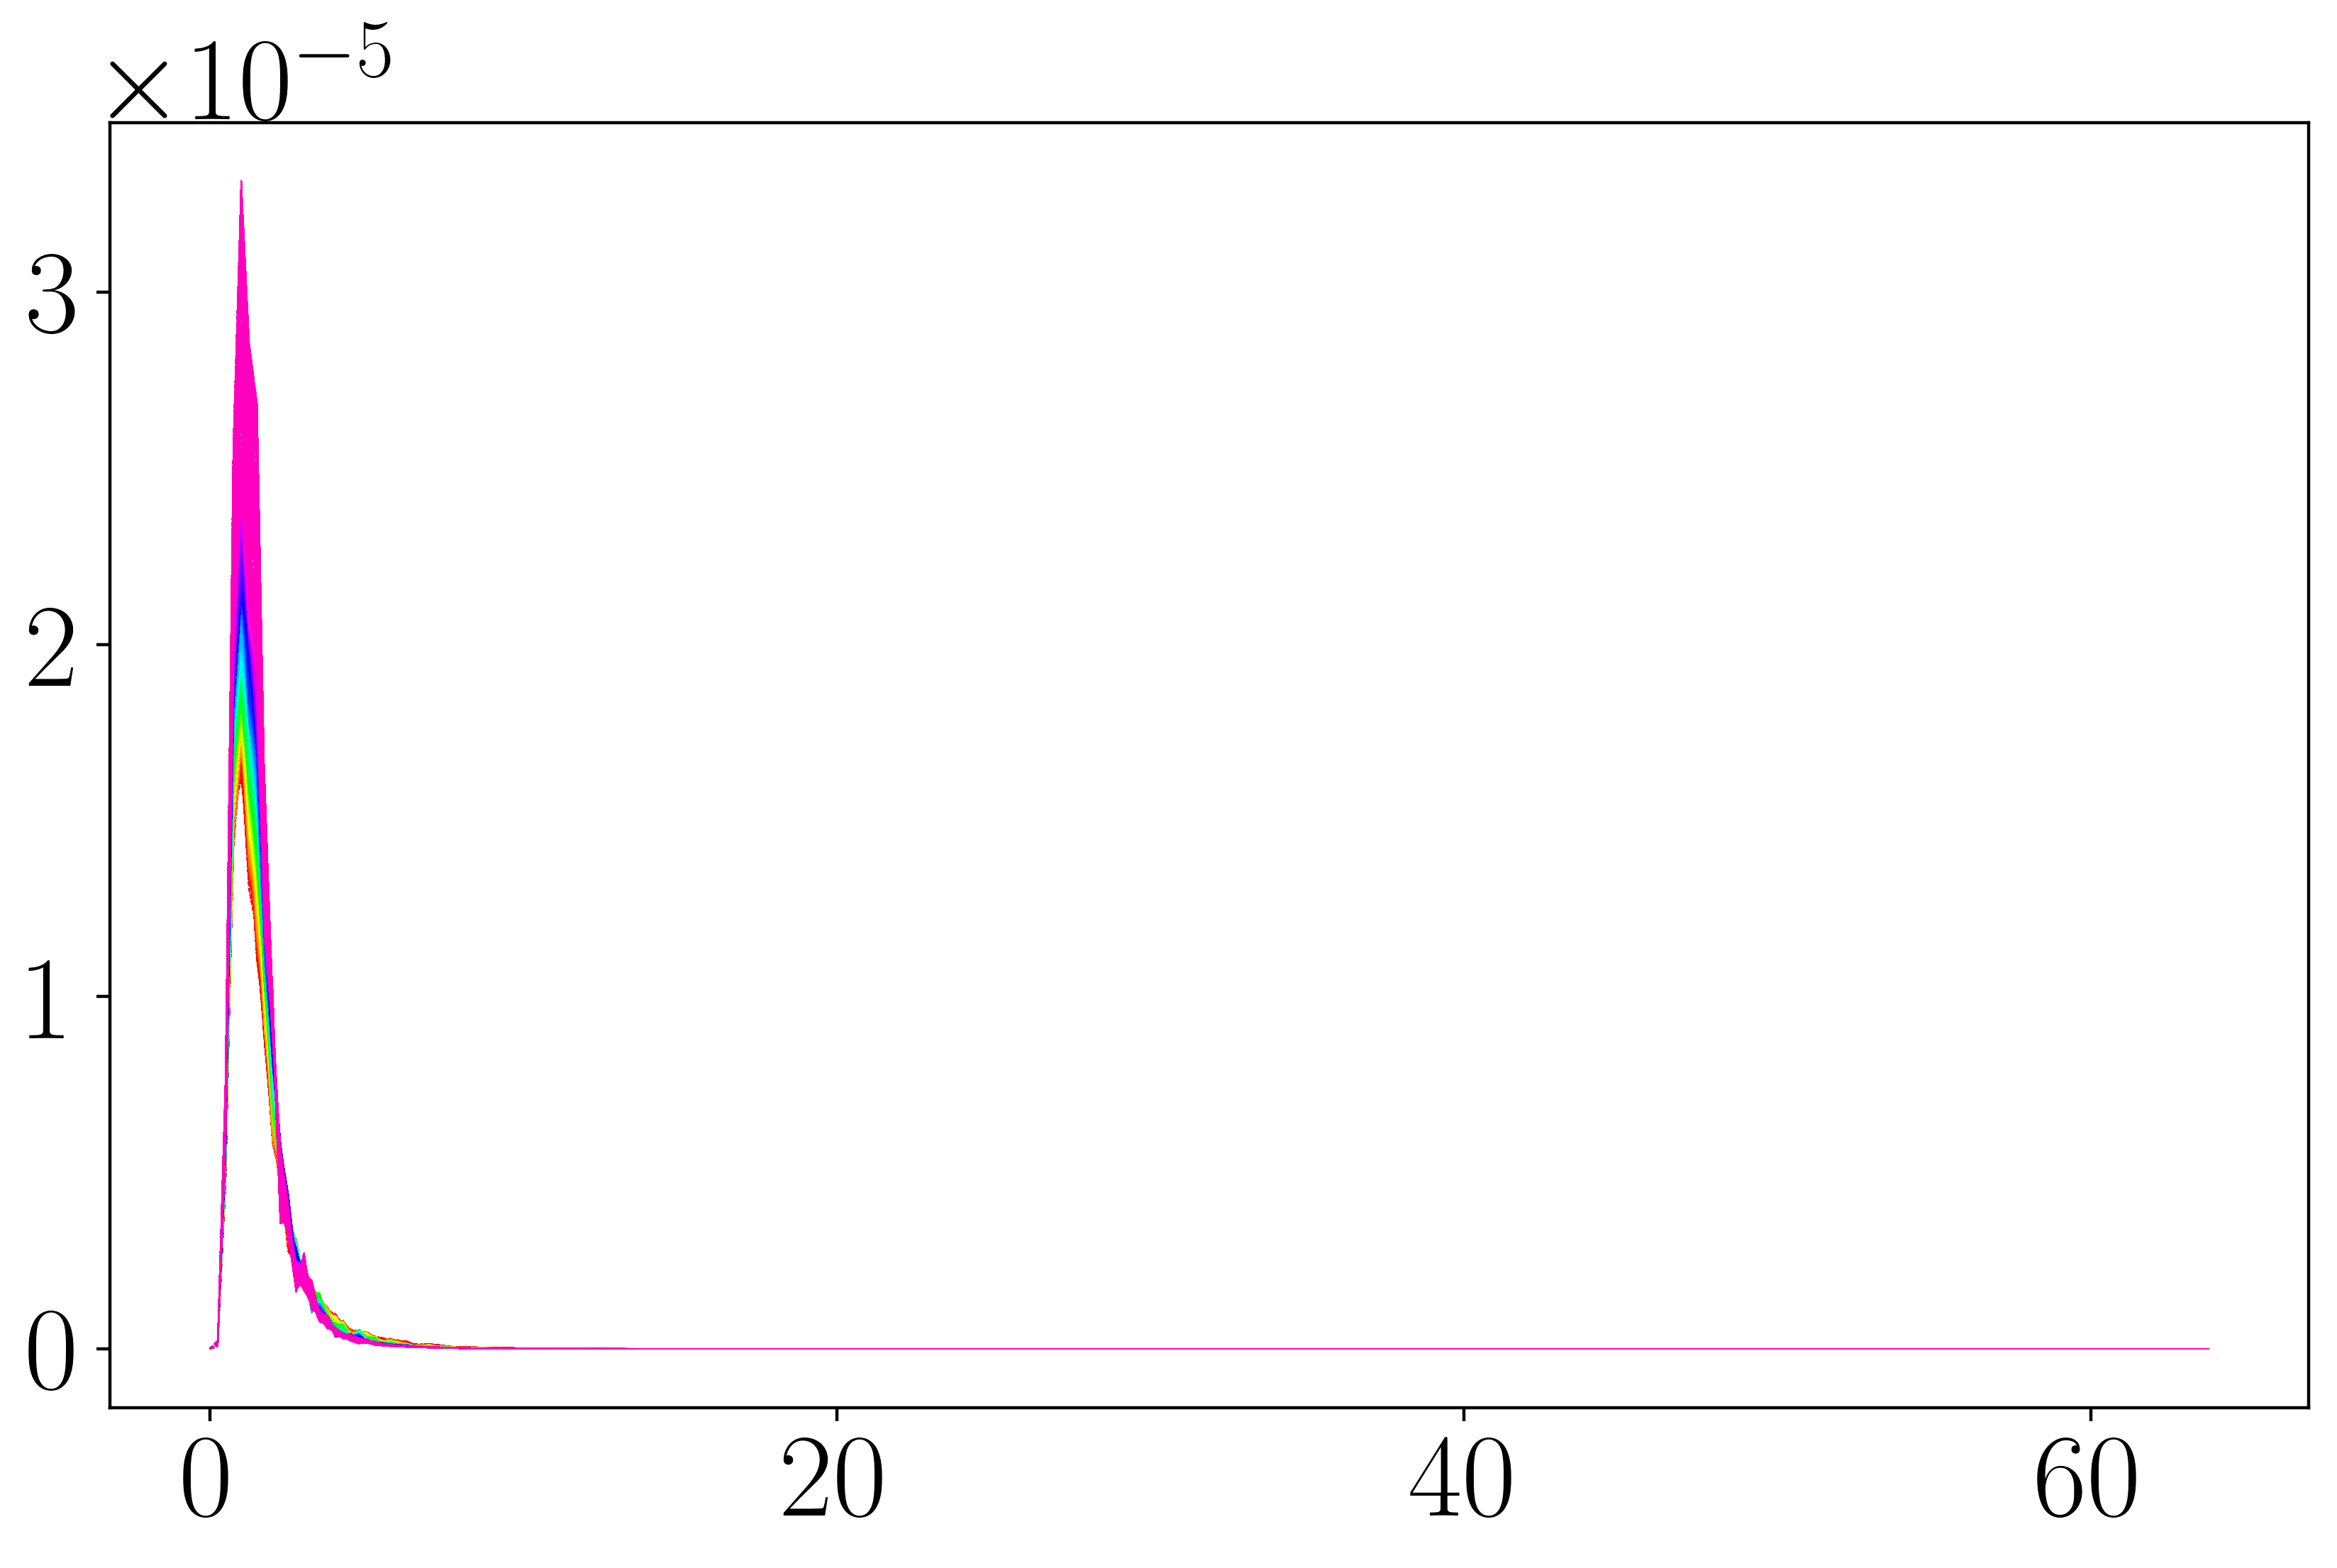

In [13]:
from scipy.interpolate import interp1d
from scipy import integrate
import csv

fig = plt.figure(figsize=(10, 6))
color_map = plt.cm.gist_rainbow
ax = fig.gca()

num_rows = 2
num_cols = 3

j = 0

variance = []
integral = []
polar_integral = []

k_seleccionados =[]

# modes growth
energy_interval_time = []
coordx_mode = []
k_second = []

energy_secondmode = []
coordx_secondmode =[]

F_mode =[]
filtered_coordx_mode = []
filtered_energy_mode = []

E_interval = []

with open(f'/projects/DEIKE/cmartinb/energies/eta_series_re{reA}_bo0{Bo}_P{kpHs}_uoc{uoc}_reW{reW}_L{maxLevel}_energies.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    for i in range(len(eta_series)):

        #recorre el tiempo

        eta = eta_series[i]

        k, F_center, F_center_polar_integrated, F_center_polar, k_tile, kxp_tile, kyp_tile, theta_tile, theta, varr, integ, int_pol , kx, ky = spectrum_integration(
            eta - np.mean(eta), N, L, CHECK=False)

        E_interval = []

        #print(i)

        for m in range(41):
            if m == 0:
                # Primer punto
                idx_start, idx_end = 0, 1
            elif m == len(k) - 1:
                # Último punto
                idx_start, idx_end = m - 1, m
            else:
                # Puntos intermedios
                idx_start, idx_end = m - 1, m + 1
                
            F_integral_interval = integrate.trapezoid(F_center_polar_integrated[idx_start:idx_end+1], k[idx_start:idx_end+1])
            
            #print('idx start',idx_start, 'idx end', idx_end )
            
            k_seleccionados.append(k[m]) # lista con la energia de cada intervalo [IN .....IN]

            psd = ax.plot(k/4, F_center_polar_integrated, '--', color=plt.cm.get_cmap('gist_rainbow')(j), alpha=0.7, linewidth=0.3)

            #ax.axvline(x = k[m]/4, color = 'grey', alpha =0.3)
            
            #print('k[idx_start]',k[idx_start],'k[idx_end]', k[idx_end])
            
            #print('i',i,'interval' ,k[idx_start:idx_end+1], 'F_center_polar_integrated',F_center_polar_integrated[idx_start:idx_end+1], 'F ingrated interpol', F_integral_interval,'l',m)

            E_interval.append(F_integral_interval)
            
            writer.writerow([i, m, F_integral_interval, omegap*(time[i]-time[0])])
            
            #f.write(interval_str)
        
        energy_interval_time.append(E_interval) #lista con la energia de todos intervalos para cada tiempo [[I1.... IN]_0.....[IN...IN]_N] en tiempo i

        #writer.writerow(E_interval)
        
        
        j += 1

# plot where are the nodes

for km in k_seleccionados:
    ax.axvline(x=km/4, color='gray', linestyle='--', linewidth=0.3)

ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
#plt.legend(loc='upper right', fontsize=4)


color_values =  (omegap*(np.array(time)-time[0]))

# Now set the normalization with the correct range

norm = plt.Normalize(vmin=color_values.min(), vmax=color_values.max())
sm = plt.cm.ScalarMappable(cmap=color_map, norm=norm)
sm.set_array([])  

# Add the colorbar to the figure
cbar = plt.colorbar(sm, orientation='horizontal', pad=0.2)

# Set colorbar label and other properties if needed
cbar.set_label('$\omega_{p} t$')


fig.tight_layout()
cbar.set_label('$\omega_{p} t$')
plt.xscale('log')
plt.xlim([0,10])
#plt.ylim([10**-8,1])
plt.yscale('log')
plt.xlabel('$\mathdefault{k/k_{p}}$')
plt.ylabel('$\mathdefault{\Phi(k)}$')
fig.tight_layout()

In [14]:
df = pd.read_csv(f'/projects/DEIKE/cmartinb/energies/eta_series_re{reA}_bo0{Bo}_P{kpHs}_uoc{uoc}_reW{reW}_L{maxLevel}_energies.csv', names=['i', 'k', 'F_integral_interval', 'time'])

In [15]:
# Crear una columna de grupo para cada 'i' que indique el número de intervalo
df['interval_num'] = df.groupby('i').cumcount()

# Ahora pivotar el DataFrame para que cada fila sea una 'i' y cada columna un intervalo
df_pivot = df.pivot(index='i', columns='interval_num', values='F_integral_interval')

# Si deseas que el DataFrame resultante tenga únicamente los valores de integración sin los índices de intervalos como nombres de columnas
df_pivot.columns = [f'interval_{i}' for i in range(len(df_pivot.columns))]

# Resetea el índice para que 'i' sea una columna normal en lugar de un índice
df_pivot = df_pivot.reset_index()

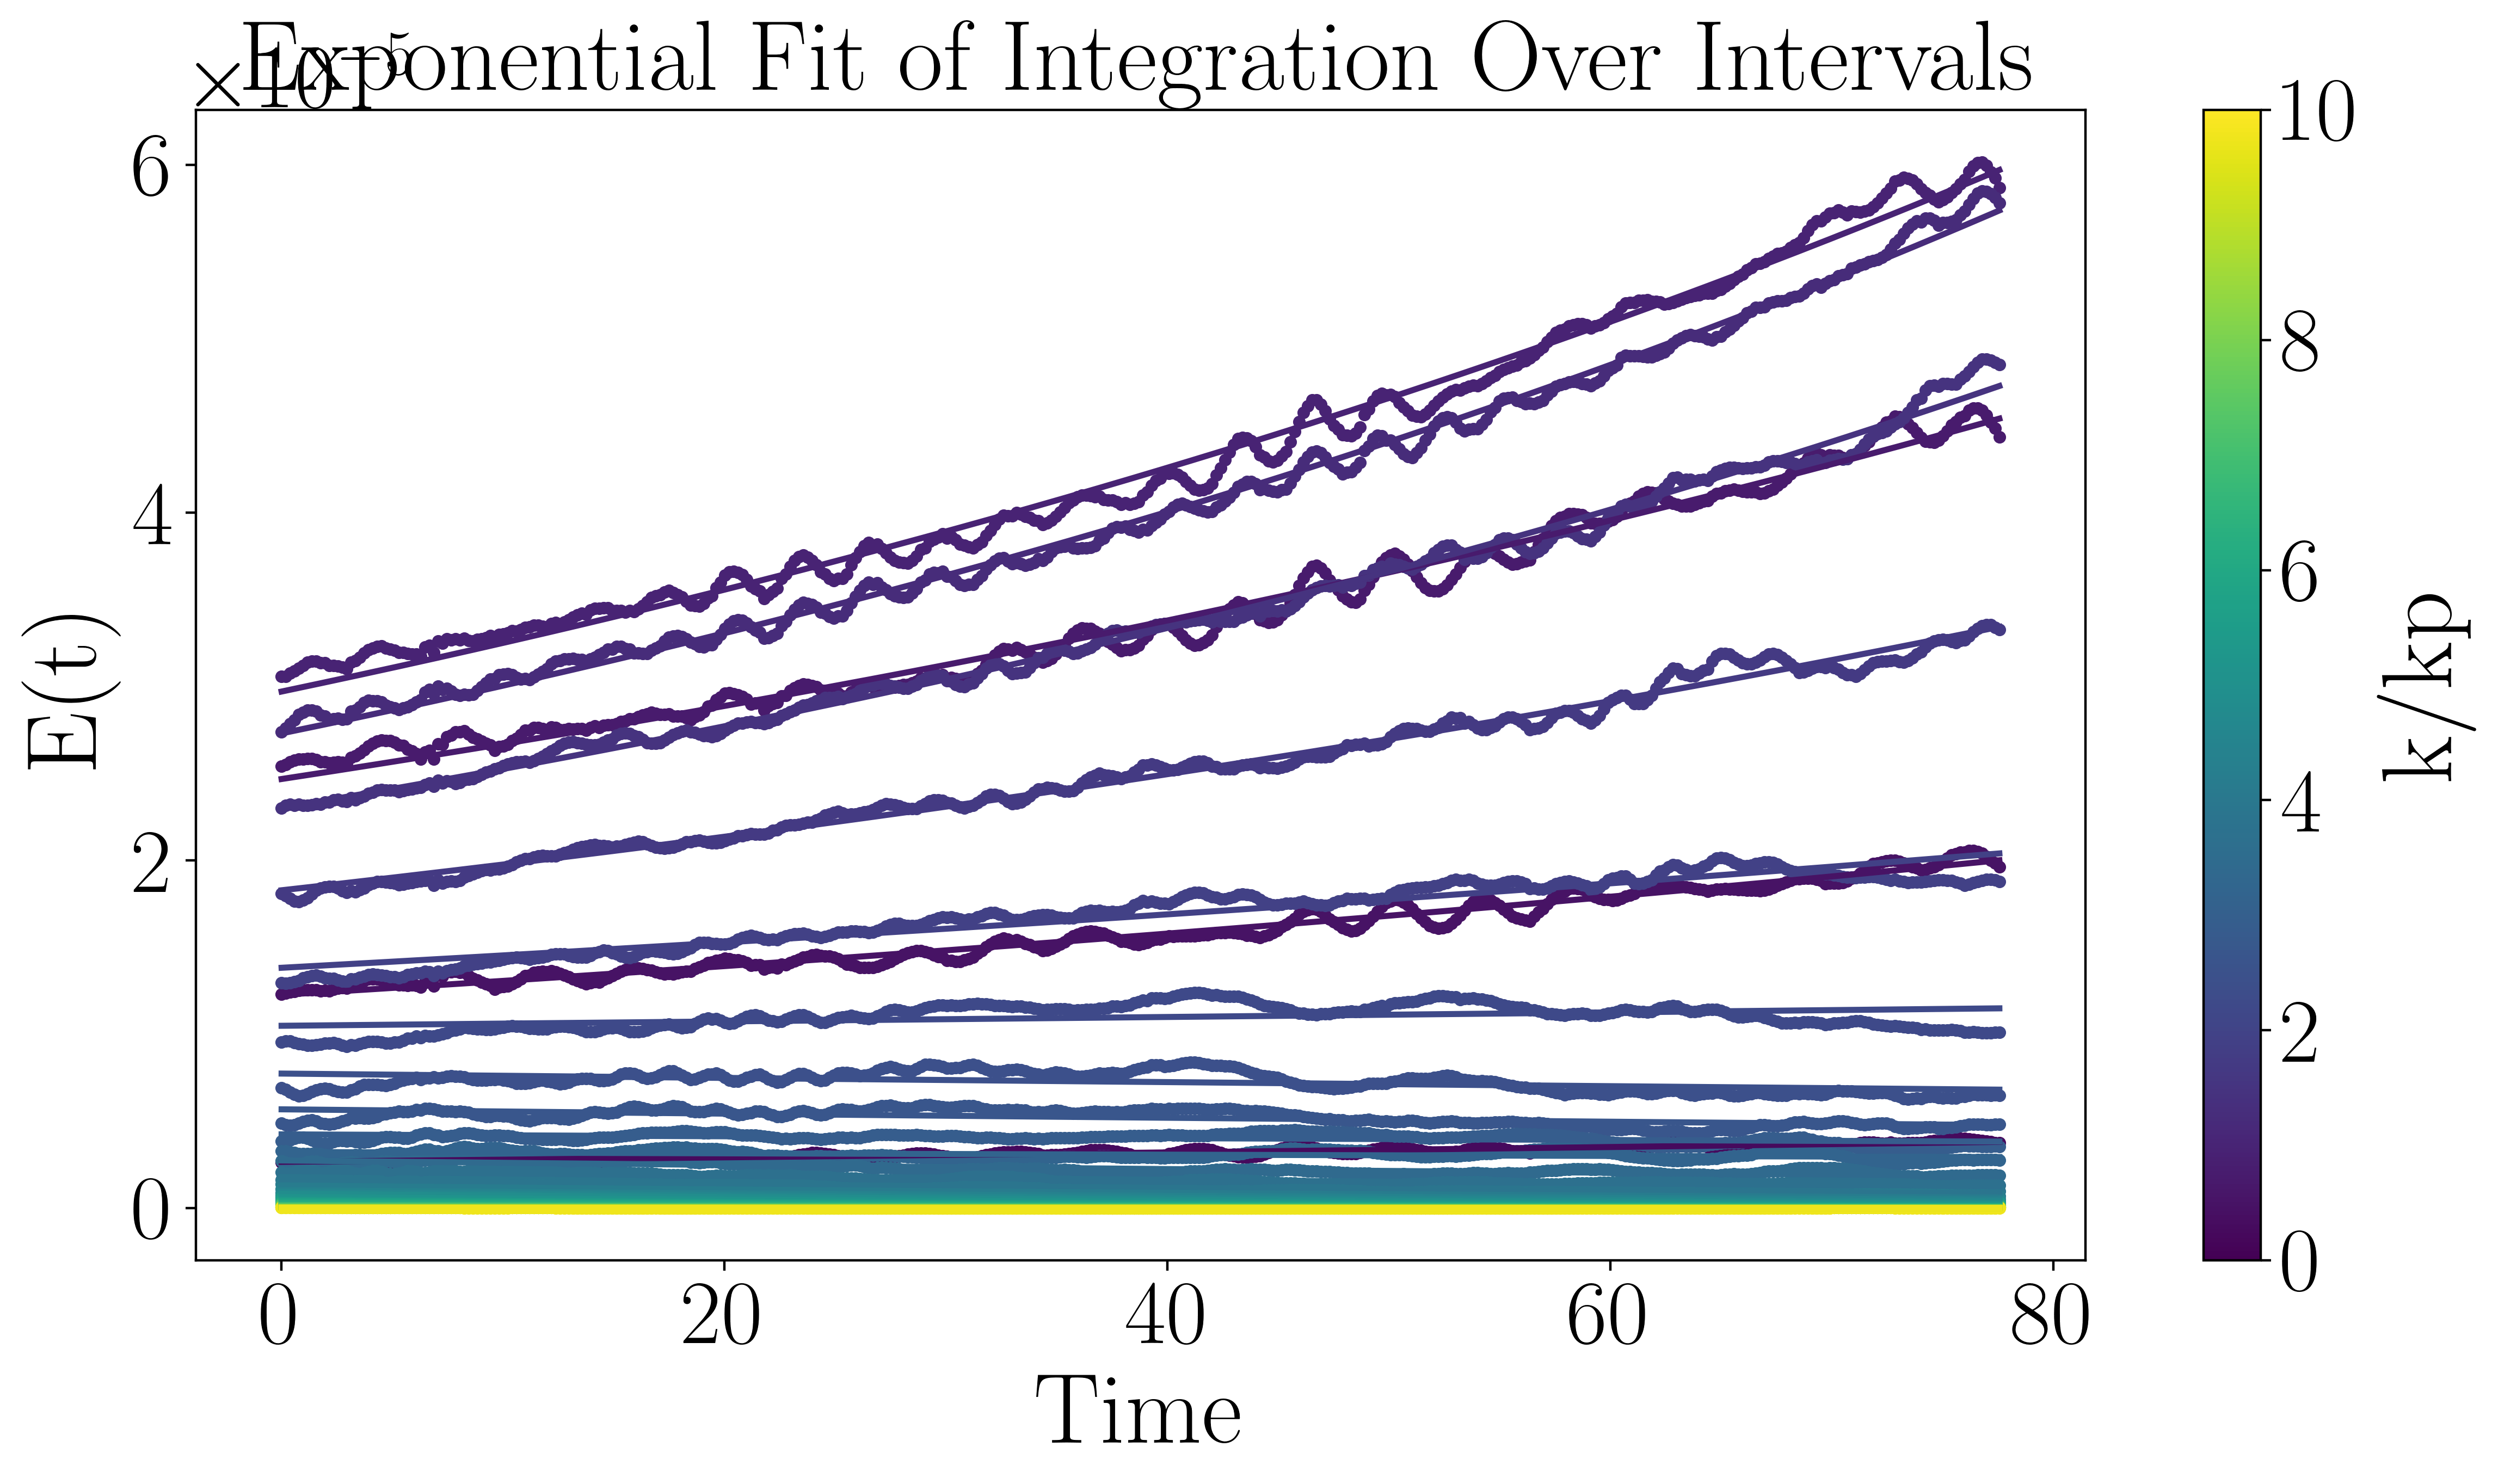

Growth betas: [0.002025057909198341, 0.004618463708475985, 0.006300451781753937, 0.007858856002790756, 0.008997120594208952, 0.009572757462152871, 0.00927897335673473, 0.007780494817529982, 0.005015377836508484, 0.0011761112039071892]
Decay betas: [-0.00163772783854579, -0.0022317958479609137, -0.0013221459903538558, -0.0012117668834337849, -0.004951121964110686, -0.006696778721308278, -0.008000966821672877, -0.009744334112818923, -0.009135814238169452, -0.010652089816626575, -0.012563601432764379, -0.01252080290188548, -0.012437204694125946, -0.013635263271034639, -0.014426246620637387, -0.01257046210619773, -0.00983934405941384, -0.01020024737714921, -0.0126342081895664, -0.012538376630318345, -0.011409538690705885, -0.009776854139151131, -0.0082046636973718, -0.008369425344750646, -0.008715524319487184, -0.008325198222201093, -0.007449664326691365, -0.0076036780443703425, -0.007217249100218934, -0.005946480392046892, -0.0052260279287284234]
Growth k: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [52]:
from scipy.optimize import curve_fit

# Asumiendo que 'df_pivot' es tu DataFrame y que 'time' y 'k_seleccionados' están definidos
colormap = cm.viridis
normalize = plt.Normalize(vmin=0, vmax=(len(df_pivot.columns) - 2)/4)  # normalizar basado en el número de intervalos

# Crear una figura y un eje para el ploteo
fig, ax = plt.subplots(figsize=(14, 7))

# Definir la función del modelo exponencial
def exp_model(x, a, b):
    return a * np.exp(b * x)

# Crear listas para almacenar los parámetros de crecimiento y decadencia
beta_growth = []
beta_decay = []

k_growth = []
k_decay = []

# Iterar sobre cada intervalo y realizar ajuste exponencial
for idx, column in enumerate(df_pivot.columns[1:]):  # Ignora la primera columna que es 'i'
    # Extraer datos para el intervalo actual
    mode_total_norm = df_pivot[column].dropna()  # Eliminar valores NaN por seguridad
    tiempo_valido = omegap*(time[:len(mode_total_norm)-1]-tstart)  # Asegurar que tiempo y mode_total_norm tengan la misma longitud
    
    mode_total_norm = mode_total_norm[:-1]
    
    # Ajuste exponencial solo si todos los valores son positivos y hay suficientes datos
    if len(mode_total_norm) > 1 and np.all(mode_total_norm > 0):
        popt, pcov = curve_fit(exp_model, tiempo_valido, mode_total_norm, p0=(1, 0.001), maxfev=100000)
        a, b = popt
        if b > 0:
            beta_growth.append(b)
            k_growth.append(idx)
        else:
            beta_decay.append(b)
            k_decay.append(idx)
        
        # Realizar gráfico para cada intervalo
        color = cm.viridis(idx / len(df_pivot.columns[1:]))  # Normalizar color
        ax.scatter(tiempo_valido, mode_total_norm, color=color, s=10)
        ax.plot(tiempo_valido, exp_model(tiempo_valido, *popt), color=color, lw=2)

# Configurar gráfico
ax.set_xlabel('Time')
ax.set_ylabel('E(t)')
ax.set_title('Exponential Fit of Integration Over Intervals')
plt.colorbar(cm.ScalarMappable(norm=normalize, cmap=colormap), label='k/kp')
#plt.legend()
plt.show()

# Imprimir los valores de beta para crecimiento y decadencia
print("Growth betas:", beta_growth)
print("Decay betas:", beta_decay)
print("Growth k:", k_growth)

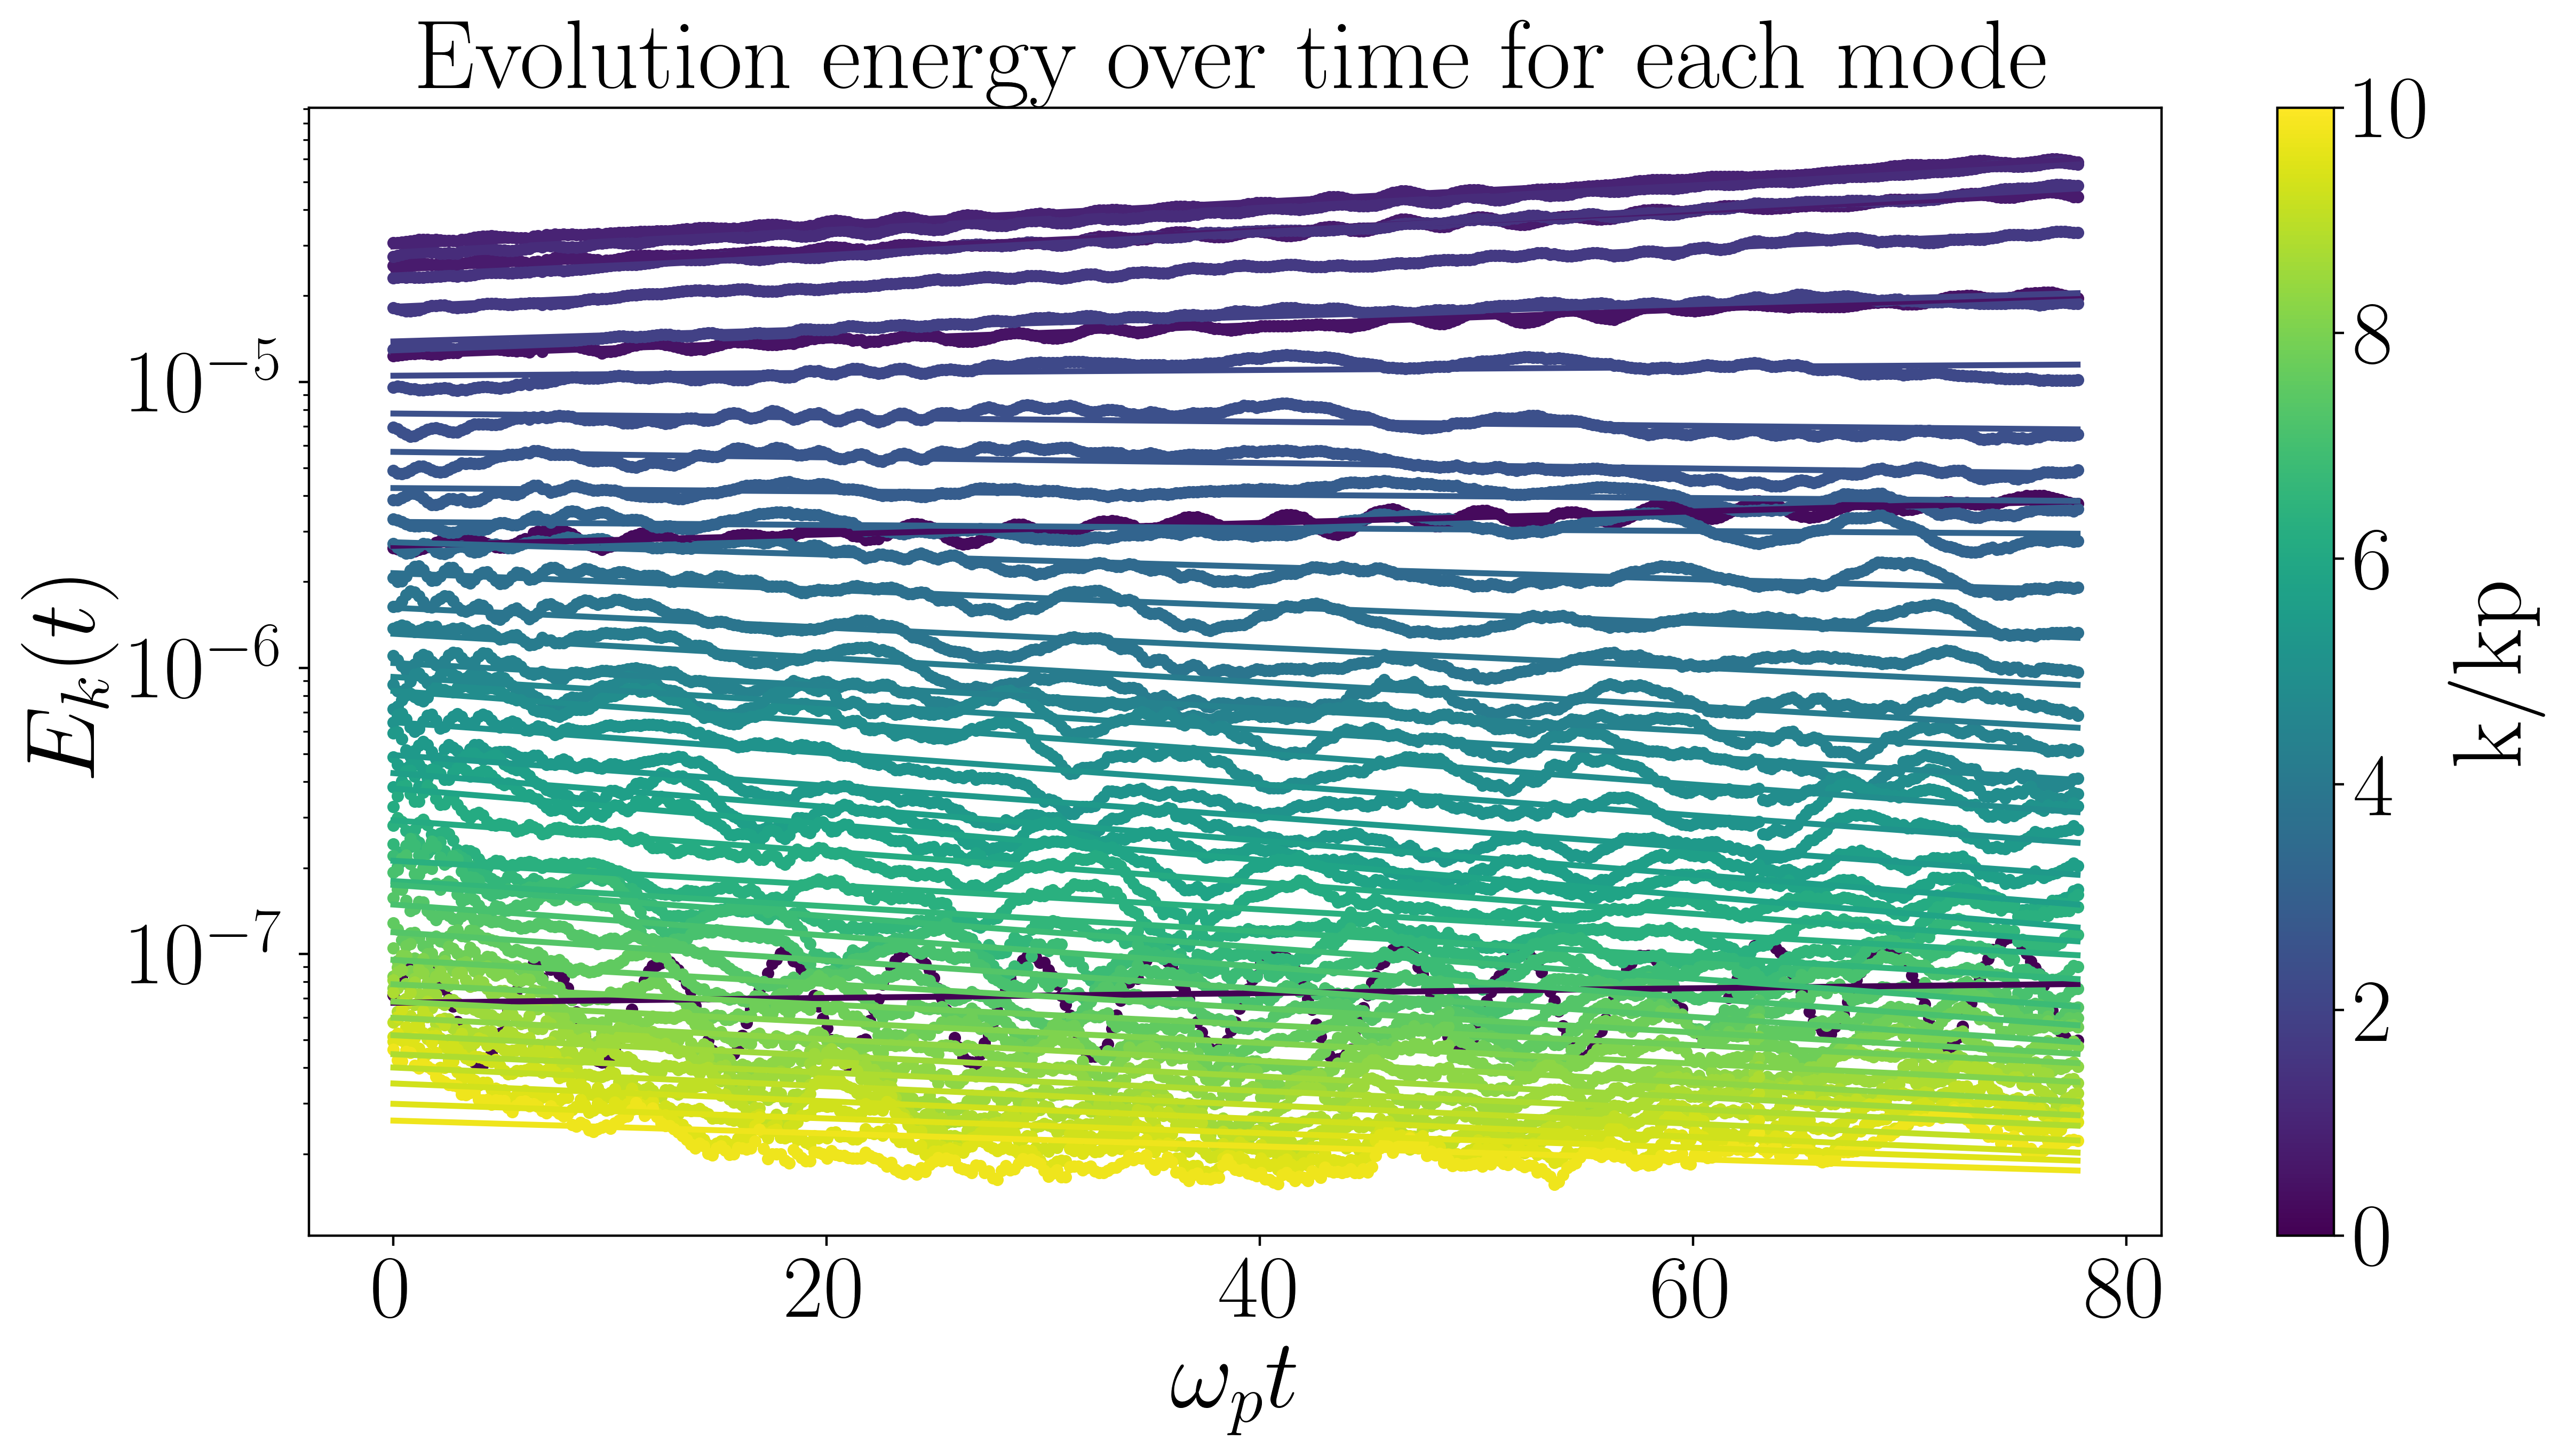

Growth betas: [0.0019452288674015428, 0.004613423913221537, 0.006294475397811995, 0.007851028451795198, 0.008990559296936502, 0.009573697492385158, 0.009285812986456235, 0.007778029368270741, 0.004995943110093696, 0.001153123168734551]
Decay betas: [-0.00164440461328805, -0.0022271169316829386, -0.0013329081726579975, -0.0012222115363287917, -0.004947833167777785, -0.006690921612055805, -0.007986380924226523, -0.009731322222605908, -0.009135147534213925, -0.010650864045011308, -0.012547180650951572, -0.012483652684522655, -0.012388591247896893, -0.013597894705542757, -0.014391417550973166, -0.01251991269612919, -0.009777172260634594, -0.010144147293517461, -0.012590206985264942, -0.012497822047404308, -0.011368908876108098, -0.009731157033002931, -0.008154581761410819, -0.00831982552475773, -0.008667173469243889, -0.008279854744579743, -0.007401169282813224, -0.0075476332937055544, -0.007155344697149009, -0.005882798068162185, -0.005177020003154933]
Growth k: [0, 1, 2, 3, 4, 5, 6, 7, 8

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.optimize import curve_fit

# Asumiendo que 'df_pivot' es tu DataFrame y que 'time' y 'k_seleccionados' están definidos
colormap = cm.viridis
normalize = plt.Normalize(vmin=0, vmax=(len(df_pivot.columns) - 2)/4)  # normalizar basado en el número de intervalos

# Crear una figura y un eje para el ploteo
fig, ax = plt.subplots(figsize=(14, 7))

# Definir la función del modelo exponencial
def exp_model(x, a, b):
    return a * np.exp(b * x)

# Crear listas para almacenar los parámetros de crecimiento y decadencia
beta_growth = []
beta_decay = []

k_growth = []
k_decay = []

# Iterar sobre cada intervalo y realizar ajuste exponencial
for idx, column in enumerate(df_pivot.columns[1:]):  # Ignora la primera columna que es 'i'
    # Extraer datos para el intervalo actual
    mode_total_norm = df_pivot[column].dropna()  # Eliminar valores NaN por seguridad
    tiempo_valido = omegap*(time[:len(mode_total_norm)]-tstart)  # Asegurar que tiempo y mode_total_norm tengan la misma longitud
    
    # Ajuste exponencial solo si todos los valores son positivos y hay suficientes datos
    if len(mode_total_norm) > 1 and np.all(mode_total_norm > 0):
        popt, pcov = curve_fit(exp_model, tiempo_valido, mode_total_norm, p0=(1, 0.001), maxfev=10000)
        a, b = popt
        if b > 0:
            beta_growth.append(b)
            k_growth.append(idx)
        else:
            beta_decay.append(b)
            k_decay.append(idx)
        
        # Realizar gráfico para cada intervalo
        color = cm.viridis(idx / len(df_pivot.columns[1:]))  # Normalizar color
        ax.scatter(tiempo_valido, mode_total_norm, color=color, s=10)
        ax.plot(tiempo_valido, exp_model(tiempo_valido, *popt), color=color, lw=2)

# Configurar gráfico
ax.set_xlabel(r'$\omega_{p} t$')
ax.set_ylabel(r'$E_{k}(t)$')
ax.set_title('Evolution energy over time for each mode')
plt.colorbar(cm.ScalarMappable(norm=normalize, cmap=colormap), label='k/kp')
#plt.legend()

plt.yscale('log')

plt.show()
# Imprimir los valores de beta para crecimiento y decadencia
print("Growth betas:", beta_growth)
print("Decay betas:", beta_decay)
print("Growth k:", k_growth)
print("Decay k:", k_decay)

In [25]:
import pandas as pd
import numpy as np

# Creation Df for growth and decay
df_growth = pd.DataFrame({
    'Tipo': 'Growth',
    'Beta': beta_growth,
    'k': k_growth
})

df_decay = pd.DataFrame({
    'Tipo': 'Decay',
    'Beta': beta_decay,
    'k': k_decay
})

df_beta = pd.concat([df_growth, df_decay], axis=0).reset_index(drop=True)

# Guardar el DataFrame combinado en un archivo CSV
df_beta.to_csv(f'/projects/DEIKE/cmartinb/betas/betas_re{reA}_bo0{Bo}_P{kpHs}_uoc{uoc}_reW{reW}_L{maxLevel}.csv', index=False)

In [54]:
print(f'/projects/DEIKE/cmartinb/betas/betas_re{reA}_bo0{Bo}_P{kpHs}_uoc{uoc}_reW{reW}_L{maxLevel}.csv')

/projects/DEIKE/cmartinb/betas/betas_re720_bo0200_P0p08_uoc0p25_reW1.0e5_L10.csv


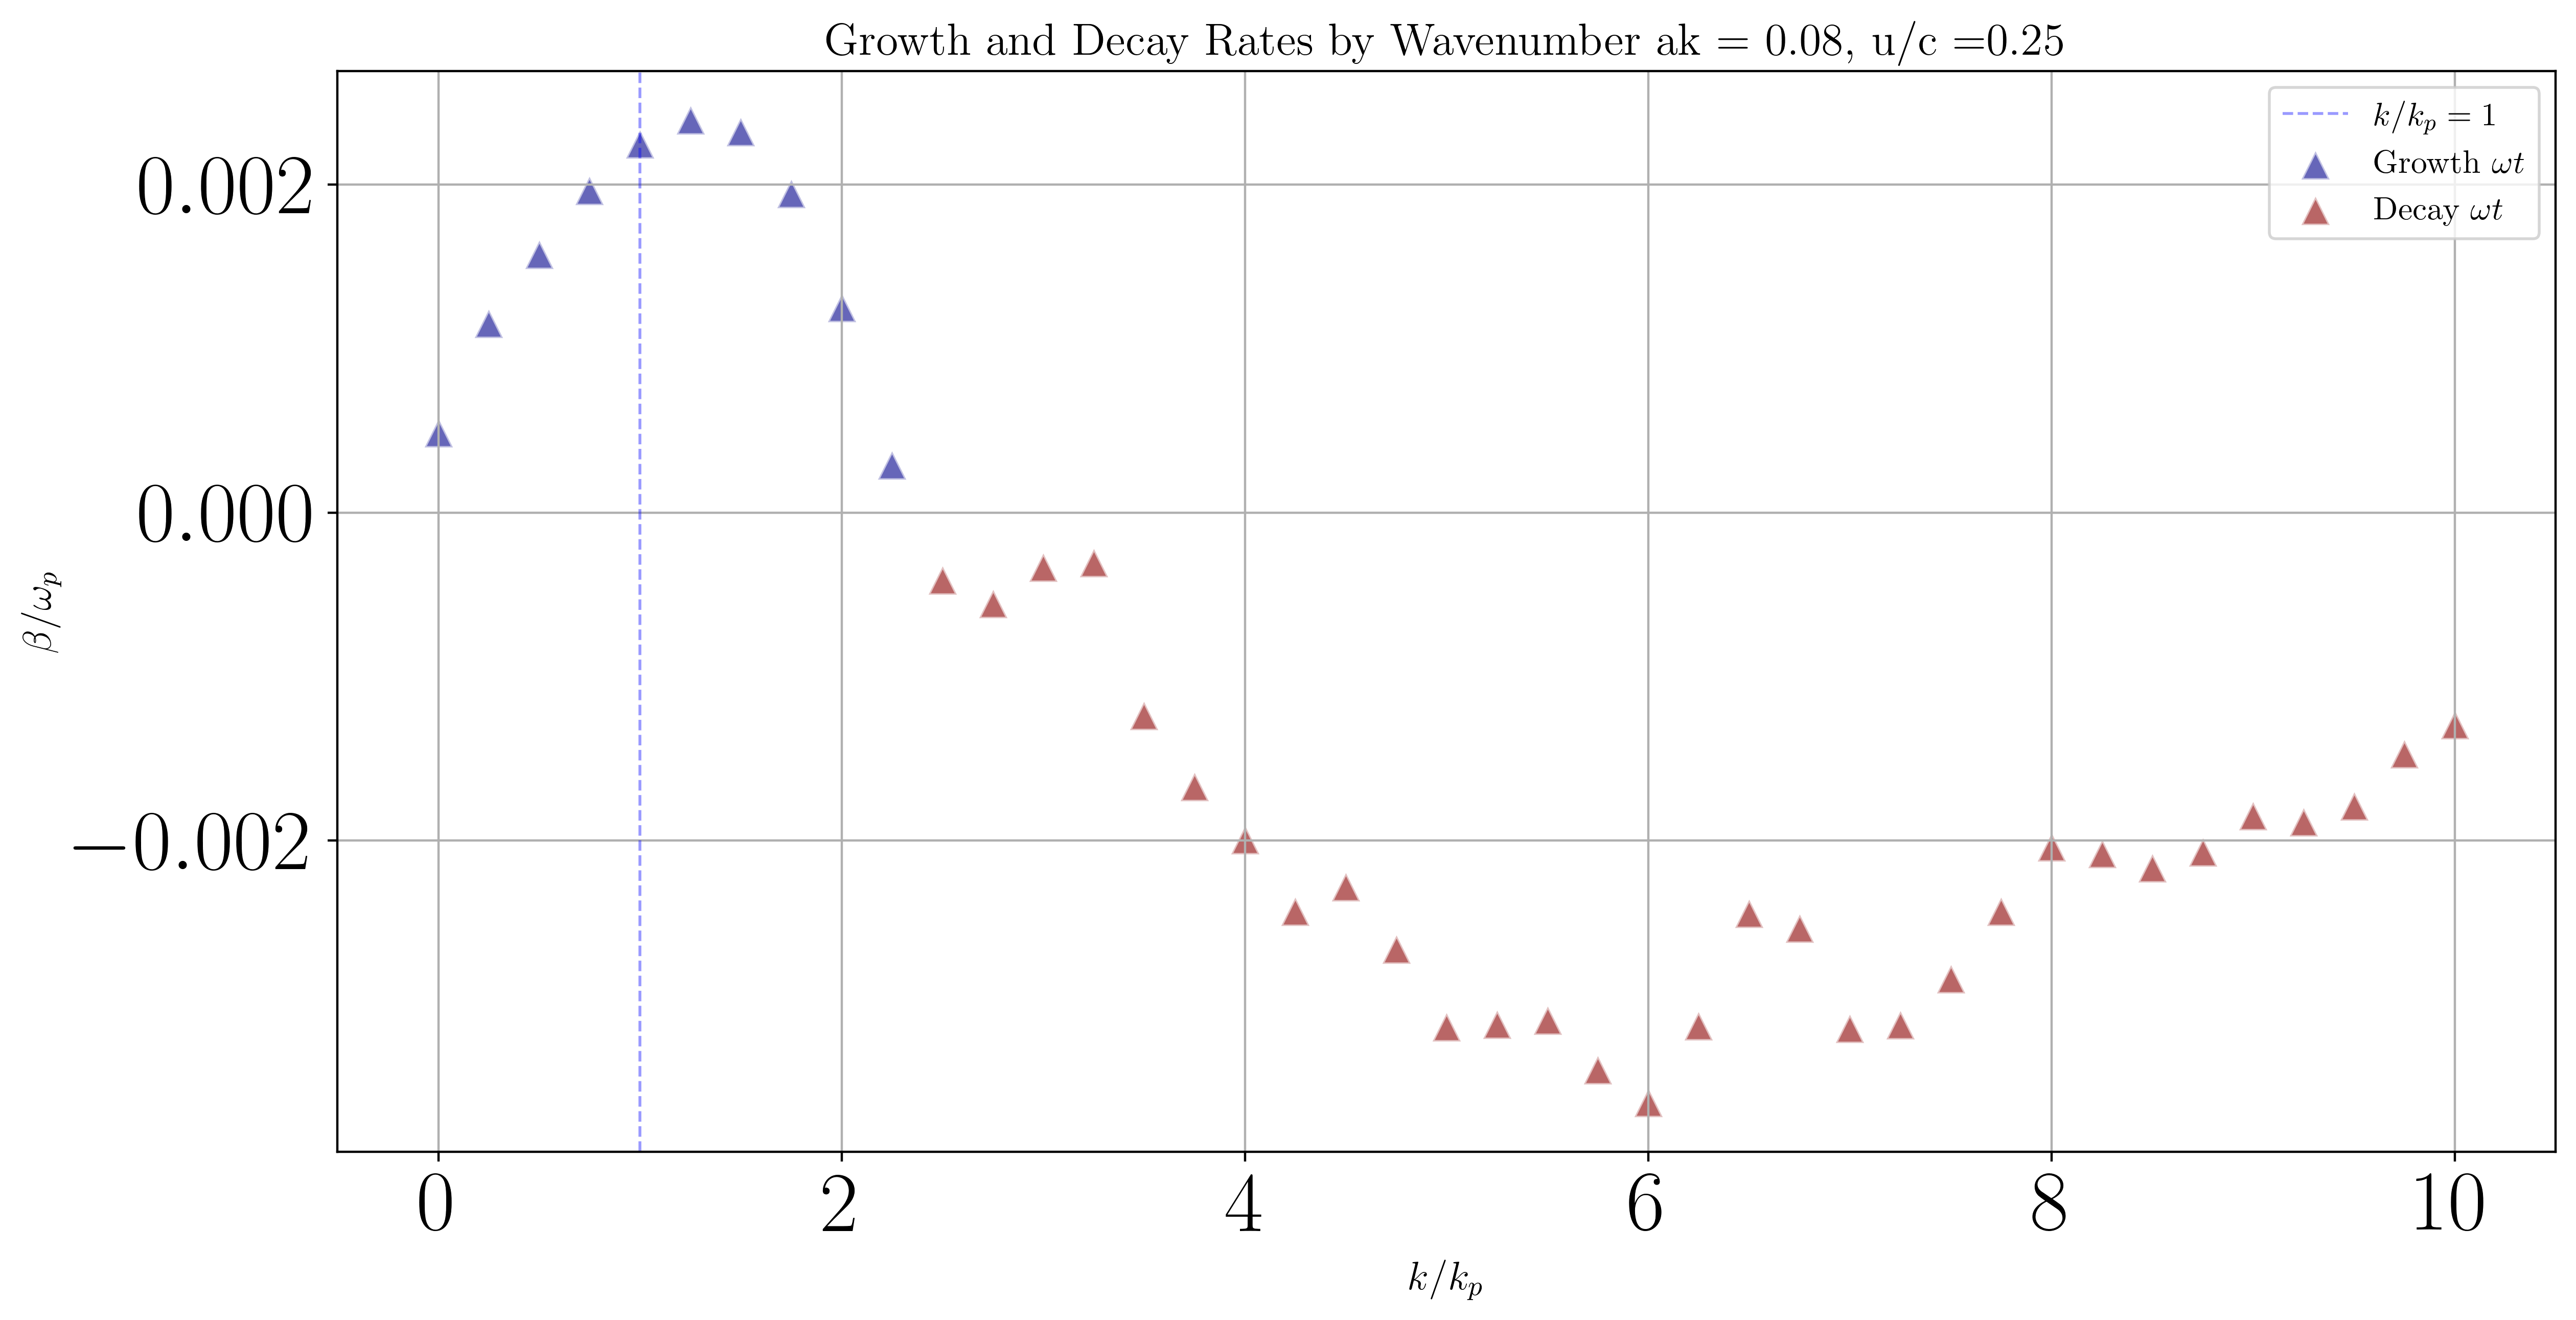

In [26]:
fig, ax = plt.subplots(figsize=(14, 7))
plt.scatter([k/4 for k in k_growth], [beta/omegap for beta in beta_growth], c='darkblue', marker= "^", label=r'Growth $\omega t$', alpha=0.6, edgecolors='w', s=100)
plt.scatter([k/4 for k in k_decay], [beta/omegap for beta in beta_decay], c='darkred', marker= "^", label=r'Decay $\omega t$ ', alpha=0.6, edgecolors='w', s=100)
# Añadir etiquetas y título
plt.xlabel(r'$k/k_p$', fontsize=14)
plt.ylabel(r'$\beta / \omega_{p}$', fontsize=14)
plt.title(f'Growth and Decay Rates by Wavenumber ak = {ak}, u/c ={u/c}', fontsize=16)
plt.axvline(x=1, color='blue', linestyle='--', linewidth=1, alpha= 0.4,  label=r'$k/k_{p}=1$')
# Añadir leyenda
plt.legend()

# Añadir cuadrícula para mejor visualización
plt.grid(True)

# Ajustar límites si es necesario
#plt.xlim([-0.2, 0.2])
#plt.ylim([-0.008, 0.008])
plt.savefig(f'/projects/DEIKE/cmartinb/graphs/2D_spectra/re{reA}_bo0{Bo}_P{kpHs}_uoc{uoc}_reW{reW}_L{maxLevel}/growth_rate.png')

# Mostrar el gráfico
plt.show()

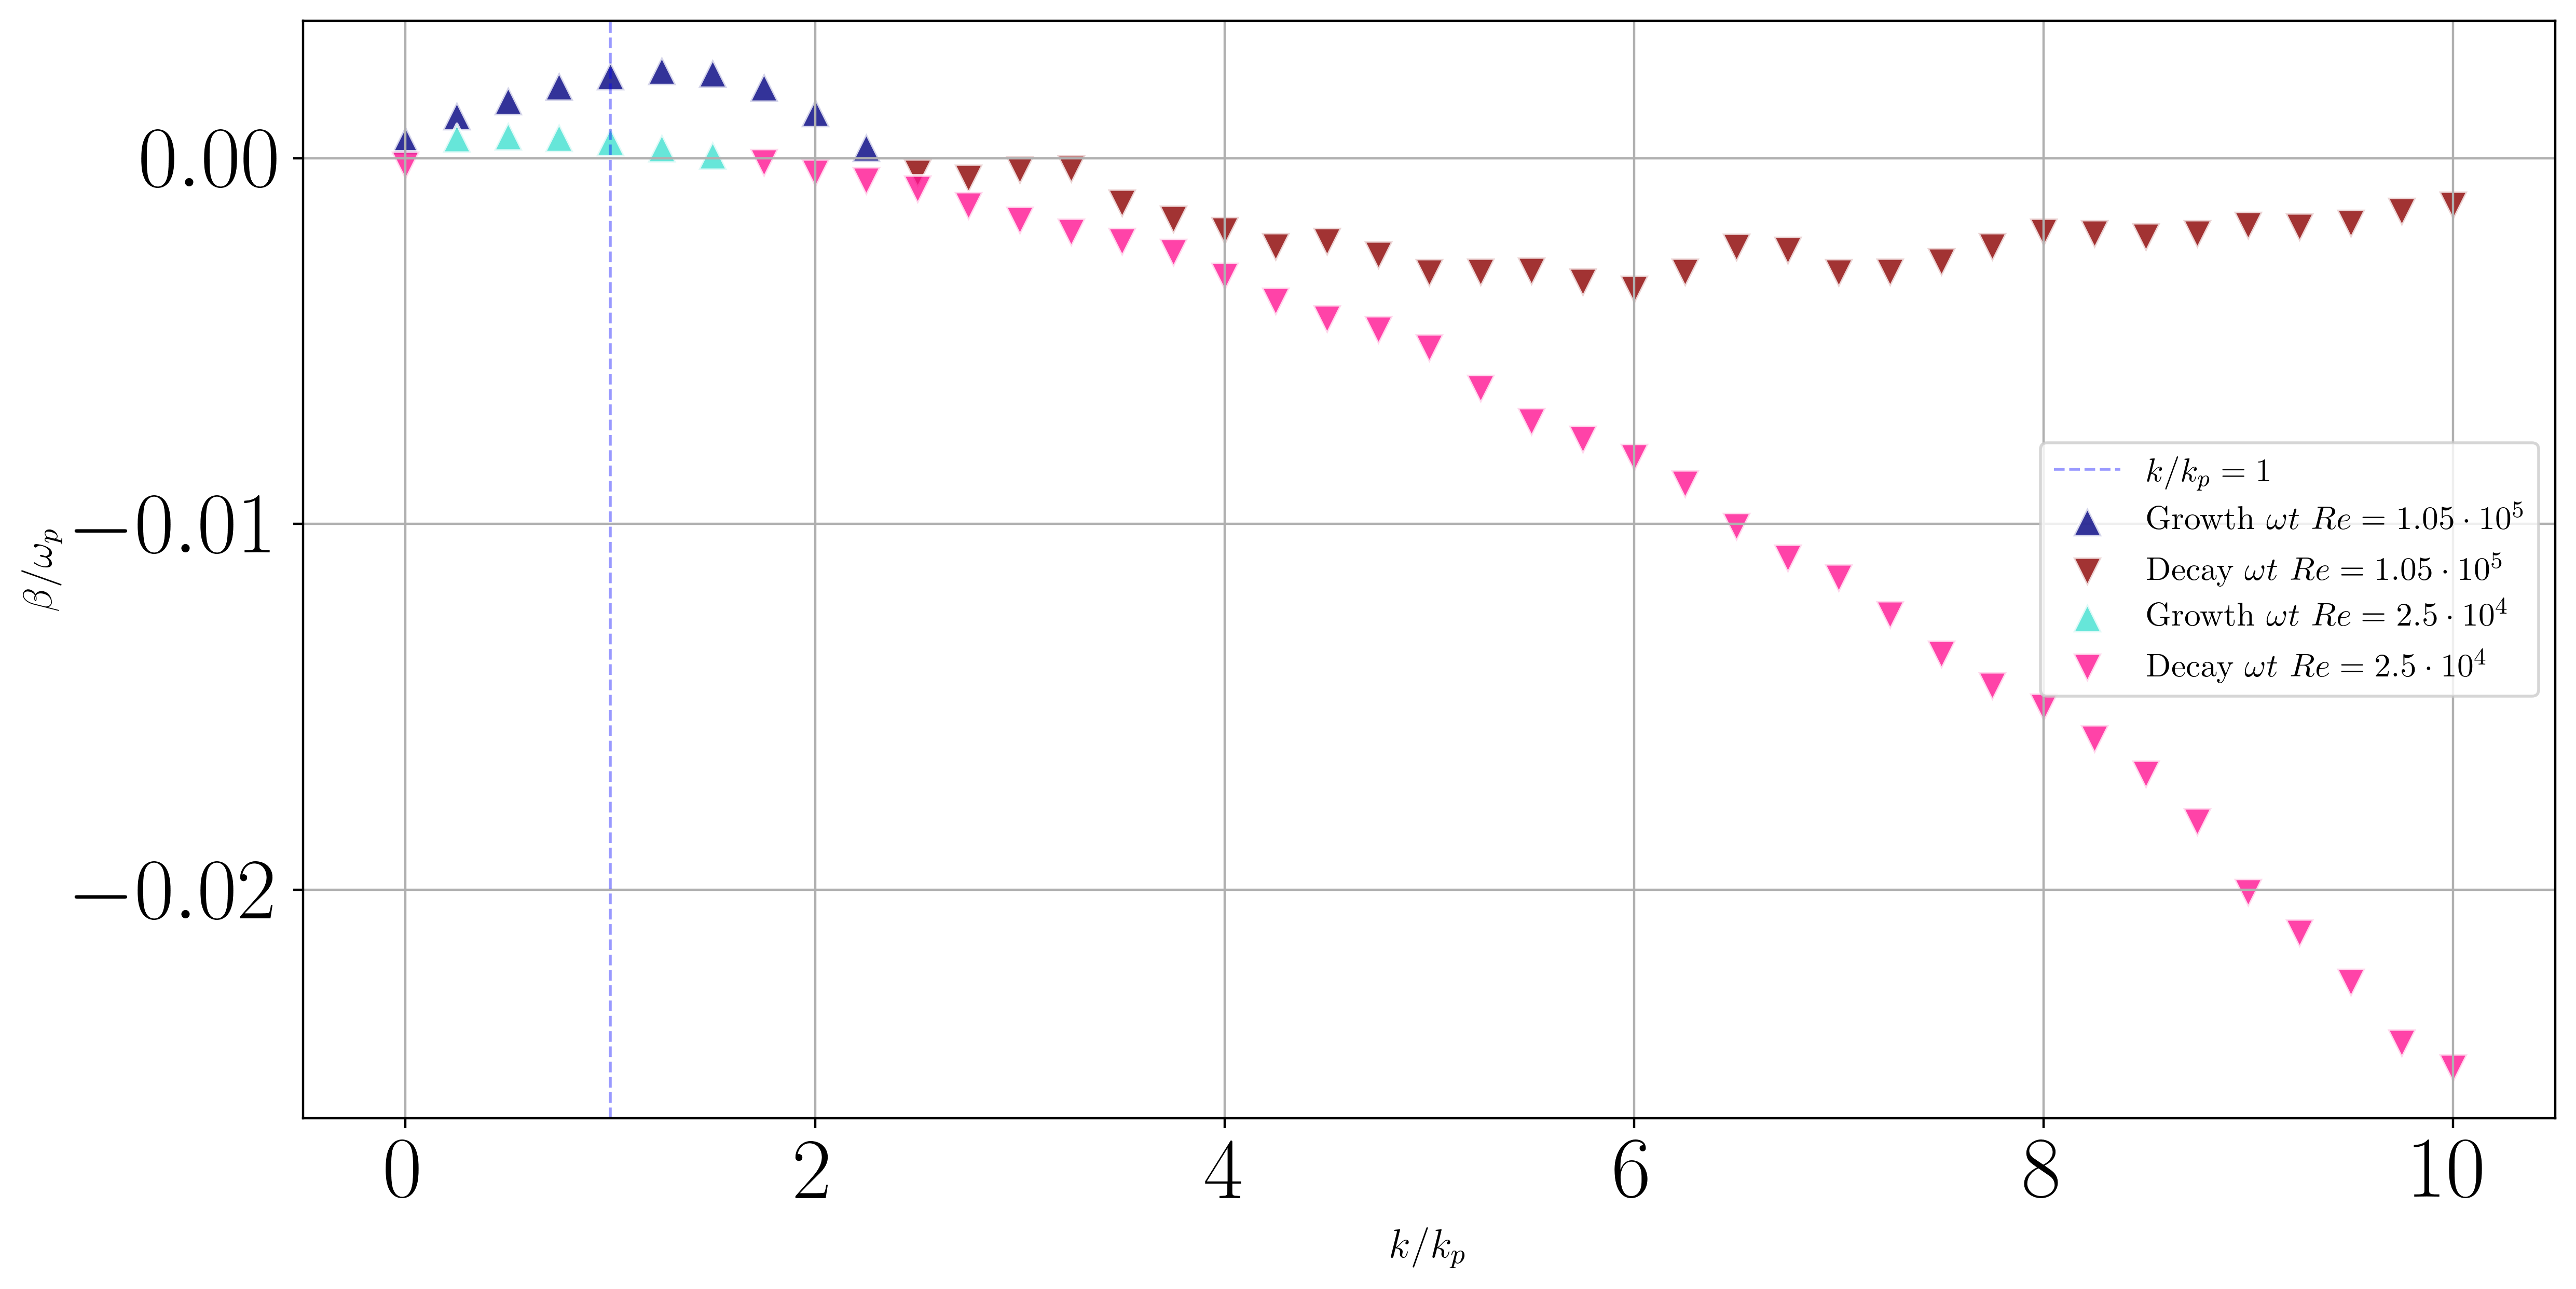

In [28]:
df_beta_kpHs016_upc05 = pd.read_csv(f'/projects/DEIKE/cmartinb/betas/betas_re720_bo0200_P{kpHs}_uoc{uoc}_reW2.5e4_L10.csv')

df_growth_kpHs016_upc05 = df_beta_kpHs016_upc05[df_beta_kpHs016_upc05['Tipo'] == 'Growth']
df_decay_kpHs016_upc05 = df_beta_kpHs016_upc05[df_beta_kpHs016_upc05['Tipo'] == 'Decay']

k_growth_kpHs016_upc05 = df_growth_kpHs016_upc05['k']
k_decay_kpHs016_upc05 = df_decay_kpHs016_upc05['k']
beta_growth_kpHs016_upc05 = df_growth_kpHs016_upc05['Beta']
beta_decay_kpHs016_upc05 = df_decay_kpHs016_upc05['Beta']

fig, ax = plt.subplots(figsize=(14, 7))
plt.scatter([k/4 for k in k_growth], [beta/omegap for beta in beta_growth], c='navy', marker= "^", label=r'Growth $\omega t$ $Re = 1.05 \cdot 10^{5}$', alpha=0.8, edgecolors='w', s=100)
plt.scatter([k/4 for k in k_decay], [beta/omegap for beta in beta_decay], c='darkred', marker= "v", label=r'Decay $\omega t$  $Re = 1.05 \cdot 10^{5}$', alpha=0.8, edgecolors='w', s=100)
plt.scatter([k/4 for k in k_growth_kpHs016_upc05], [beta/omegap for beta in beta_growth_kpHs016_upc05], c='turquoise', marker= "^", label=r'Growth $\omega t$ $Re = 2.5 \cdot 10^{4}$', alpha=0.8, edgecolors='w', s=100)
plt.scatter([k/4 for k in k_decay_kpHs016_upc05], [beta/omegap for beta in beta_decay_kpHs016_upc05], c='deeppink', marker= "v", label=r'Decay $\omega t$  $Re = 2.5 \cdot 10^{4}$', alpha=0.8, edgecolors='w', s=100)
# Añadir etiquetas y título
plt.xlabel(r'$k/k_p$', fontsize=14)
plt.ylabel(r'$\beta / \omega_{p}$', fontsize=14)
#plt.title(f'Growth and Decay Rates by Wavenumber ak = {kpHs}, u/c ={uoc}', fontsize=16)
plt.axvline(x=1, color='blue', linestyle='--', linewidth=1, alpha= 0.4,  label=r'$k/k_{p}=1$')
# Añadir leyenda
plt.legend()

# Añadir cuadrícula para mejor visualización
plt.grid(True)

# Ajustar límites si es necesario
#plt.xlim([-0.2, 0.2])
#plt.ylim([-0.05, 0.01])
plt.savefig(f'/projects/DEIKE/cmartinb/graphs/2D_spectra/growth_rate_diffRe_{kpHs}_{uoc}.png')

# Mostrar el gráfico
plt.show()


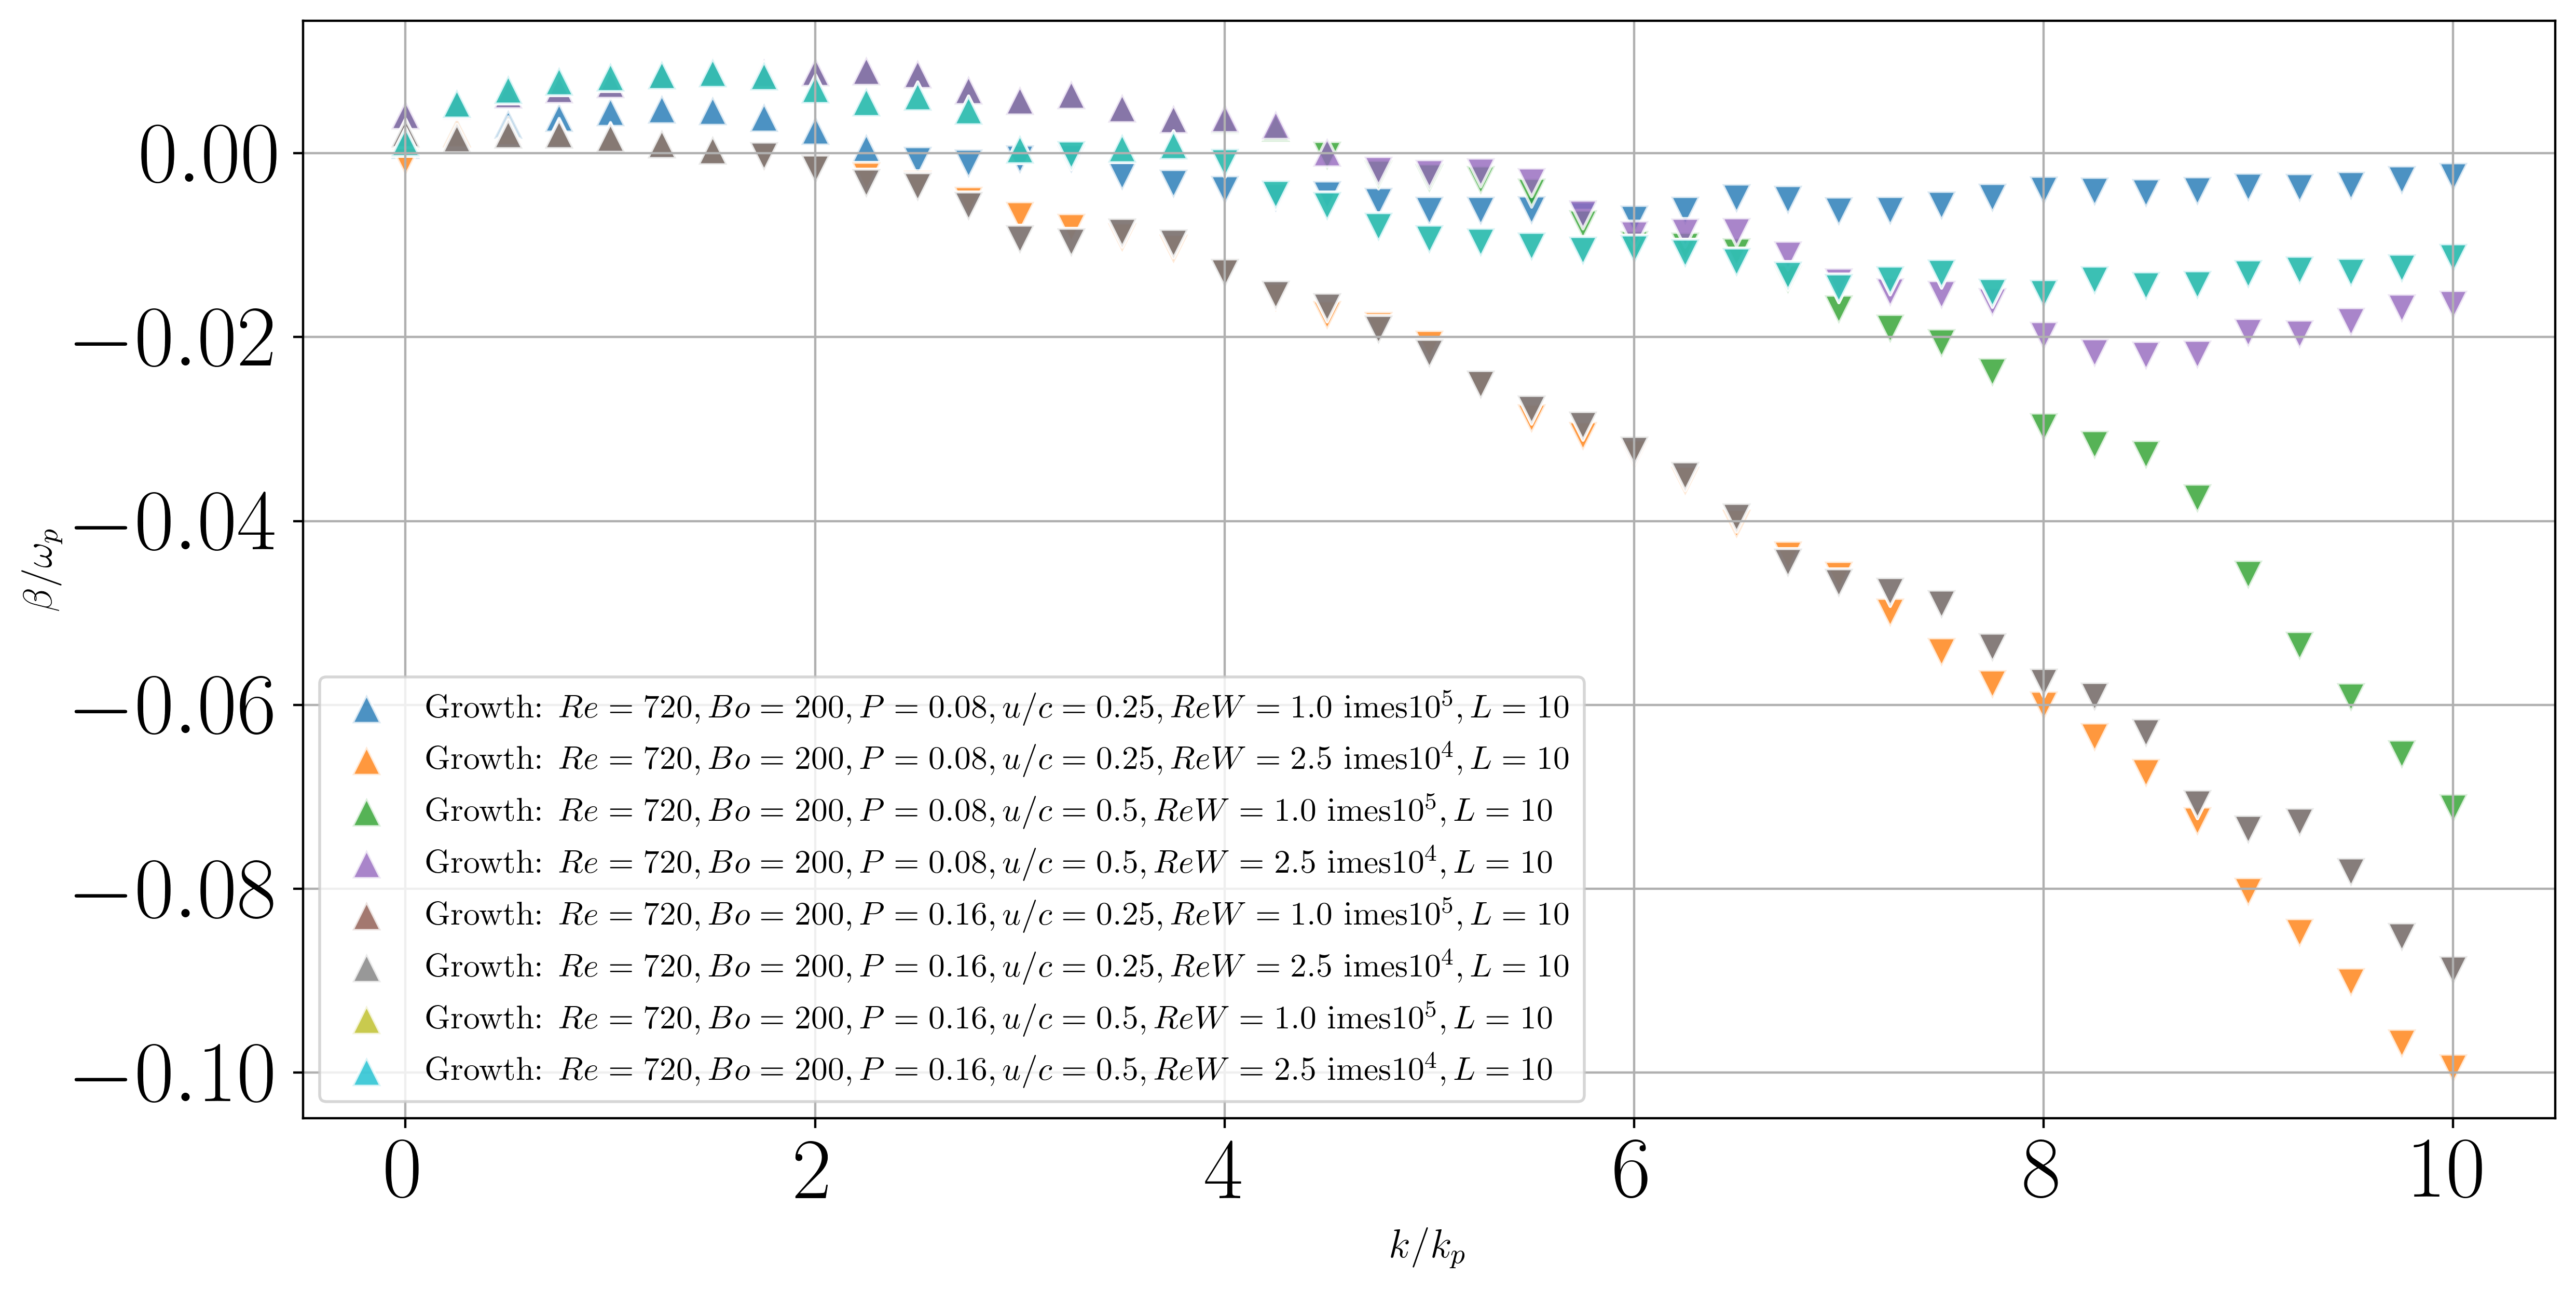

In [62]:
import math as m
# List of cases
cases = [
    "re720_bo0200_P0p08_uoc0p25_reW1.0e5_L10",
    "re720_bo0200_P0p08_uoc0p25_reW2.5e4_L10",
    "re720_bo0200_P0p08_uoc0p50_reW1.0e5_L10",
    "re720_bo0200_P0p08_uoc0p50_reW2.5e4_L10",
    "re720_bo0200_P0p16_uoc0p25_reW1.0e5_L10",
    "re720_bo0200_P0p16_uoc0p25_reW2.5e4_L10",
    "re720_bo0200_P0p16_uoc0p50_reW1.0e5_L10",
    "re720_bo0200_P0p16_uoc0p50_reW2.5e4_L10"
]

# Function to extract Re value from the case name
def extract_parameters(case_name):
    parts = case_name.split('_')
    reA = parts[0].replace('re', '')
    Bo = parts[1].replace('bo0', '')
    kpHs = parts[2].replace('P', '').replace('p', '.')
    uoc = parts[3].replace('uoc', '').replace('p', '.')
    reW = parts[4].replace('reW', '').replace('e', '$\times$ 10^')
    maxLevel = parts[5].replace('L', '')
    return reA, Bo, kpHs, uoc, reW, maxLevel

# Existing function to calculate parameters
def calculate_parameters(kpHs, uoc, u, kp):
    # Convert kpHs and uoc to their numeric values
    ak = float(kpHs.replace('p', '.'))
    uoc_val = float(uoc.replace('p', '.'))

    # Determine the value of g based on uoc
    if uoc_val == 0.50:
        g = 1
    elif uoc_val == 0.25:
        g = 4
    elif uoc_val == 0.75:
        g = 0.5
    else:
        raise ValueError("uoc value not recognized. Please use 0p25, 0p50, or 0p75.")
    
    c = u / uoc_val
    omegap = np.sqrt(g * kp)
    Re_water = 2.5 * 10**4
    nu_water = c * 2 * m.pi / (4 * Re_water)

    return ak, c, omegap, nu_water, g, uoc_val

# Initialize the plot
fig, ax = plt.subplots(figsize=(14, 7))

# Define color map
colors = plt.cm.get_cmap('tab10', len(cases))

# Loop through each case
for idx, case in enumerate(cases):
    # Read the data
    df_beta = pd.read_csv(f'/projects/DEIKE/cmartinb/betas/betas_{case}.csv')

    # Define growth and decay
    df_growth = df_beta[df_beta['Tipo'] == 'Growth']
    df_decay = df_beta[df_beta['Tipo'] == 'Decay']

    k_growth = df_growth['k']
    k_decay = df_decay['k']
    beta_growth = df_growth['Beta']
    beta_decay = df_decay['Beta']

    # Extract parameters
    reA, Bo, kpHs, uoc, reW, maxLevel = extract_parameters(case)

    # Calculate additional parameters
    u = 1  # Assuming u is 1 for the calculation
    kp = 1  # Assuming kp is 1 for the calculation
    ak, c, omegap, nu_water, g, uoc_val = calculate_parameters(kpHs, uoc, u, kp)

    # Plotting
    color = colors(idx)
    plt.scatter([k/4 for k in k_growth], [beta/omegap for beta in beta_growth], c=[color], marker= "^", label=f'Growth: $Re={reA}, Bo={Bo}, P={kpHs}, u/c={uoc_val}, ReW={reW}, L={maxLevel}$', alpha=0.8, edgecolors='w', s=100)
    plt.scatter([k/4 for k in k_decay], [beta/omegap for beta in beta_decay], c=[color], marker= "v",  alpha=0.8, edgecolors='w', s=100)

# Add labels and title
plt.xlabel(r'$k/k_p$', fontsize=14)
plt.ylabel(r'$\beta / \omega_{p}$', fontsize=14)


# Add legend
plt.legend()

# Add grid for better visualization
plt.grid(True)

# Adjust limits if necessary
# plt.xlim([-0.2, 0.2])
#plt.ylim([-0.008, 0.008])

# Save the plot
plt.savefig(f'/projects/DEIKE/cmartinb/graphs/combined_graph.png')

# Show the plot
plt.show()
